In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_excel('bank-additional-full-clean.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,-1,0,nonexistent,1.1,93994,-36.4,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,-1,0,nonexistent,1.1,93994,-36.4,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,-1,0,nonexistent,1.1,93994,-36.4,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,-1,0,nonexistent,1.1,93994,-36.4,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,-1,0,nonexistent,1.1,93994,-36.4,5191.0,0


In [3]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   default         41175 non-null  object 
 5   housing         41175 non-null  object 
 6   loan            41175 non-null  object 
 7   contact         41175 non-null  object 
 8   month           41175 non-null  object 
 9   day_of_week     41175 non-null  object 
 10  duration        41175 non-null  int64  
 11  campaign        41175 non-null  int64  
 12  pdays           41175 non-null  int64  
 13  previous        41175 non-null  int64  
 14  poutcome        41175 non-null  object 
 15  emp.var.rate    41175 non-null  float64
 16  cons.price.idx  41175 non-null  int64  
 17  cons.conf.idx   41175 non-null 

# __Exploratory Data Analysis (EDA)__

In [4]:
# Checking Imbalance data
df['deposit'].value_counts()

0    36536
1     4639
Name: deposit, dtype: int64

There are two categories in the target variable, namely 0 and 1. The number 0 represents customers who did not take a deposit, while the number 1 indicates customers who took a deposit. From the value counts, we can see that the number of customers not taking a deposit (0) is much higher than those taking a deposit (1). With 36,537 cases (86%) where customers did not take a deposit, and only 4,639 cases (14%) where customers took a deposit. This imbalance can impact the model's performance and needs attention in the analysis and development of predictive models.

In [5]:
# Define strata based on age
strata = ['age']

# Stratified sampling to balance deposit decision
deposit_no_df = df[df['deposit'] == 0]
deposit_yes_df = df[df['deposit'] == 1]

deposit_no_sample = deposit_no_df.groupby('age').sample(frac=0.12696718395051593, random_state=42) #frac is from len deposit yes and len deposit no from population
deposit_yes_sample = deposit_yes_df.copy()

# Combine balanced samples
balanced_df = pd.concat([deposit_no_sample, deposit_yes_sample])
balanced_df['deposit'].value_counts()

0    4643
1    4639
Name: deposit, dtype: int64

In [6]:
# Checking Duplicate Data
sum_duplicated = balanced_df.duplicated().sum()
percent_duplicated = balanced_df.duplicated().sum() / len(balanced_df)
print('total duplicate rows = ', sum_duplicated)
print('percentage of duplicates = ', percent_duplicated)
if sum_duplicated > 1:
    print('Duplicate data found in the sample')
else:
    print('No duplicate data found in the sample')

total duplicate rows =  0
percentage of duplicates =  0.0
No duplicate data found in the sample


We took a sample to address a significant imbalance in the target variable 'deposit.' In the original data, there was a noticeable disproportion between customers who didn't take a deposit (0) and those who did (1).

The sampling process aimed to ensure a balanced number of samples for each category, preventing biases that can occur in analysis and modeling, especially when the population data is highly unbalanced. We initially attempted modeling using the original data, but the results were poor, with precision not exceeding 60%. After sampling the data, the modeling results improved significantly compared to using the original data.

By having a balanced sample, we hope that the developed model can provide more accurate and reliable predictions for both categories. This approach aligns with basic data processing principles, where a balanced representation of the target category is crucial for accurate interpretation and trustworthy results.

The sampling technique we used is called 'Stratified Random Sampling.' The main reason for choosing this technique is to ensure that the proportions of each stratum or group in the control variable (in this case, 'age') are maintained in the sample, reflecting the true distribution in the population.

Choosing stratified random sampling is based on the following considerations:

1. Considering Age Strata: Using 'age' as a control variable or stratum ensures that the age distribution in the sample reflects the age distribution in the population. This is important to minimize potential biases and ensure accurate representation across all age groups.

2. Reducing Variability Between Strata: By sampling from each stratum, we can reduce variability between age groups. This helps generate a more homogeneous sample within each age group, improving the interpretation and generalization of the model to the population.

3. Avoiding Imbalance in the Target Variable: Stratified random sampling allows us to avoid imbalances that may occur in the control variable. In this context, the proportion of customers taking and not taking a deposit is balanced within each age group.

Choosing this technique is appropriate when facing significant imbalances in the data and the need to maintain the data structure. Thus, stratified random sampling provides a holistic and accurate approach to generating a sample that represents the entire population.

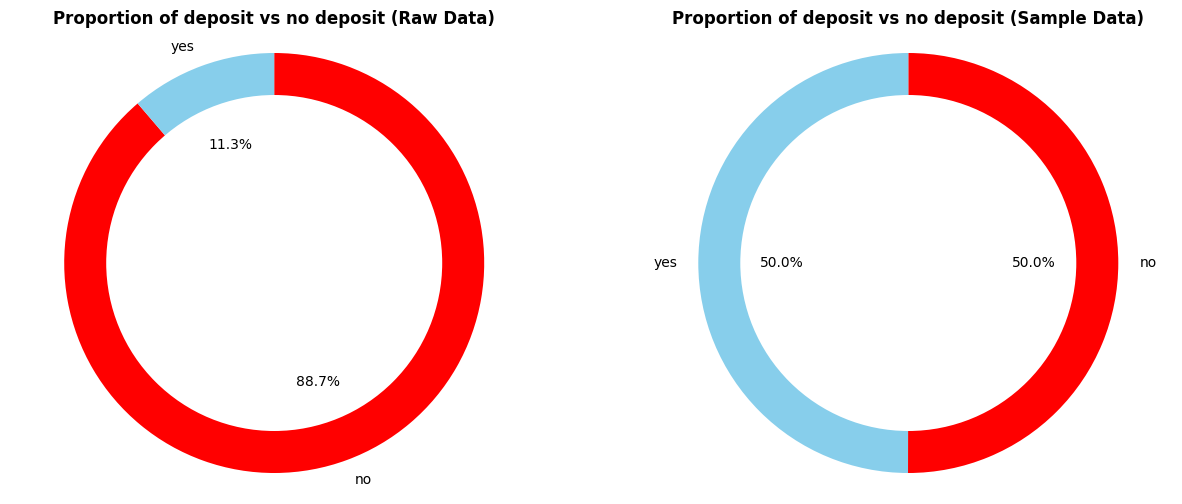

In [7]:
# Plot for data original
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
plt.pie(df['deposit'].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%', startangle=90, colors=['red', 'skyblue'], counterclock=False, textprops={'color': 'black'})
plt.axis('equal')
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of deposit vs no deposit (Raw Data)', fontweight='bold')

# Plot for sample data
plt.subplot(1, 2, 2) 
plt.pie(balanced_df['deposit'].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%', startangle=90, colors=['red', 'skyblue'], counterclock=False, textprops={'color': 'black'})
plt.axis('equal')
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of deposit vs no deposit (Sample Data)', fontweight= 'bold')

plt.show()

By taking a sample, we've successfully created a balanced representation of customers who made deposits and those who did not. This is crucial because a model trained on a balanced sample tends to provide more accurate and reliable results for both categories. In simpler terms, sampling helps correct the significant imbalance in the initial data, allowing us to develop a more representative and general model for the entire population.

We believe it's essential to conduct statistical tests to ensure that the sample distribution accurately reflects the population distribution. The goal is to assess how well the sample data represents the overall population characteristics. To achieve this, we use the following approach:

1. T-Test for Normally Distributed Data:
<br>
    - H0: Population mean is equal to the sample mean.
<br>
    - A significant result (p < 0.05) indicates a significant difference between the population and sample means.
<br>
2. Mann-Whitney U Test for Non-Normally Distributed Data:
<br>
    - H0: Population distribution is the same as the sample distribution.
<br>
    - A significant result (p < 0.05) suggests a significant difference in distribution between the population and sample.
<br>
3. Chi-Square Test for Categorical Data:
<br>
    - H0: Population category distribution is the same as the sample category distribution.
<br>
    - A significant result (p < 0.05) indicates a significant difference in category distribution between the population and sample.

This approach aims to statistically test the adequacy of the sample distribution compared to the population distribution. Non-significant results in each method suggest that the taken sample can be considered representative of the population distribution, validating their alignment.

In [8]:
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency

# T-Test for Numerical Data with Normal Distribution

# Filter data for those who did not make a deposit
balanced_df_no = balanced_df[balanced_df['deposit'] == 0]

# Variables for t-test (normal distribution variables)
normal_vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

for var in normal_vars:
    # Perform t-test
    stat_t, p_value_t = ttest_ind(deposit_no_df[var], balanced_df_no[var])
    print(f"T-Test p-value for '{var}': {p_value_t}")

    # Set the significance level
    alpha = 0.05

    # Hypothesis testing
    if p_value_t < alpha:
        print(f"Null Hypothesis Rejected: The mean of '{var}' in the sample is not the same as the population mean.")
    else:
        print(f"Not enough evidence to reject the Null Hypothesis: The mean of '{var}' in the sample is the same as the population mean.")

T-Test p-value for 'emp.var.rate': 0.3958916015370564
Not enough evidence to reject the Null Hypothesis: The mean of 'emp.var.rate' in the sample is the same as the population mean.
T-Test p-value for 'cons.price.idx': 0.3272141384928843
Not enough evidence to reject the Null Hypothesis: The mean of 'cons.price.idx' in the sample is the same as the population mean.
T-Test p-value for 'cons.conf.idx': 0.5554000917647026
Not enough evidence to reject the Null Hypothesis: The mean of 'cons.conf.idx' in the sample is the same as the population mean.
T-Test p-value for 'nr.employed': 0.34171313302191964
Not enough evidence to reject the Null Hypothesis: The mean of 'nr.employed' in the sample is the same as the population mean.


__Summary of Sample Testing__

| T-Test  | emp.var.rate         | cons.price.idx        | cons.conf.idx      | nr.employed | 
|--------------|-------------|----------------|---------------|-----|
|   P-value    | 0.42        | 0.33           | 0.71           | 0.38 |
|  Hipotesis   | Accept HO  | Accept HO     | Accept HO  | Accept HO |
|   Result   | Represent Population |Represent Population    |Represent Population  |   Represent Population|

The sample can be considered statistically representative of the population for the numerical variables 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', and 'nr.employed' because there is no significant evidence indicating a mean difference between the sample and the population. Thus, the sample data for these variables can be said to effectively represent the population data.

In [9]:
# Mann-Whitney U Test for Numerical Variable with Non-Normal Distribution

# Columns to be tested
columns_to_test = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Perform Mann-Whitney U test for each column
for var in columns_to_test:
    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(deposit_no_df[var], balanced_df_no[var])

    # Display the test results
    print(f"Mann-Whitney U Test p-value for '{var}': {p_value}")

    # Set the significance level
    alpha = 0.05

    # Hypothesis testing
    if p_value < alpha:
        print(f"Null Hypothesis Rejected: The distribution of '{var}' in the sample is not the same as the population distribution.")
    else:
        print(f"Not enough evidence to reject the Null Hypothesis: The distribution of '{var}' in the sample is the same as the population distribution.")

Mann-Whitney U Test p-value for 'age': 0.8917737438135355
Not enough evidence to reject the Null Hypothesis: The distribution of 'age' in the sample is the same as the population distribution.
Mann-Whitney U Test p-value for 'duration': 0.8935282340049041
Not enough evidence to reject the Null Hypothesis: The distribution of 'duration' in the sample is the same as the population distribution.
Mann-Whitney U Test p-value for 'campaign': 0.9261754173519421
Not enough evidence to reject the Null Hypothesis: The distribution of 'campaign' in the sample is the same as the population distribution.
Mann-Whitney U Test p-value for 'pdays': 0.31400978315066475
Not enough evidence to reject the Null Hypothesis: The distribution of 'pdays' in the sample is the same as the population distribution.
Mann-Whitney U Test p-value for 'previous': 0.3061600825942604
Not enough evidence to reject the Null Hypothesis: The distribution of 'previous' in the sample is the same as the population distribution.


__Summary of Sample Testing__

| Mann-Whitneyu Test | age         | duration        | campaign     | pdays | previous | 
|--------------|-------------|----------------|---------------|---|-----|
|   P-value    | 0.89       | 0.78           | 0.95          | 0.28 | 0.31 |
|  Hipotesis   | Accept HO  | Accept HO    | Accept HO    | Accept HO | Accept HO |
|   Result   | Represent Population | Represent Population    | Represent Population  | Represent Population |  Represent Population|

There is not enough statistical evidence to reject the null hypothesis in the Mann-Whitney test for the variables 'age', 'duration', 'campaign', 'pdays', and 'previous'. Therefore, the distributions of these variables in the sample are considered to be the same as the population distribution. Thus, the sample data for these variables is deemed capable of representing the population data.

In [10]:
from scipy import stats

# Chi-Square Test for Kategorical Variable 

def chi_square_test_for_categorical_vars(population_data, sample_data, categorical_vars, alpha=0.05):
    for var in categorical_vars:
        # Filter values present in both DataFrames
        common_values = set(population_data[var].unique())
        sample_values = set(sample_data[sample_data['deposit'] == 0][var].unique())
        valid_values = common_values.intersection(sample_values)

        # Ensure there are enough categories for the chi-square test
        if len(valid_values) >= 2:
            # Use only valid values as there might be values in the population data not present in the sample data
            population_var = population_data[population_data[var].isin(valid_values)][var]
            sample_var = sample_data[sample_data[var].isin(valid_values)][var]

            # Perform chi-square test
            chi2_statistic, p_value, _, _ = stats.chi2_contingency([sample_var.value_counts(), population_var.value_counts()])
            print(f"Chi-Square p-value for '{var}': {p_value}")

            # Display test results
            if p_value < alpha:
                print(f"Reject the null hypothesis. The {var} sample does not represent the population in terms of {var} distribution.")
            else:
                print(f"Accept the null hypothesis. The {var} sample represents the population in terms of {var} distribution.")
        else:
            print(f"Not enough valid categories for chi-square test for {var}.\n")

# Use the function for the given categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
chi_square_test_for_categorical_vars(deposit_no_df, balanced_df_no, categorical_vars)

Chi-Square p-value for 'job': 0.9989104488455743
Accept the null hypothesis. The job sample represents the population in terms of job distribution.
Chi-Square p-value for 'marital': 0.6126391288645099
Accept the null hypothesis. The marital sample represents the population in terms of marital distribution.
Chi-Square p-value for 'education': 0.7878285102388551
Accept the null hypothesis. The education sample represents the population in terms of education distribution.
Chi-Square p-value for 'default': 0.0957920870058074
Accept the null hypothesis. The default sample represents the population in terms of default distribution.
Chi-Square p-value for 'housing': 0.542643511407589
Accept the null hypothesis. The housing sample represents the population in terms of housing distribution.
Chi-Square p-value for 'loan': 0.8397915546449046
Accept the null hypothesis. The loan sample represents the population in terms of loan distribution.
Chi-Square p-value for 'contact': 0.2812670430783989
Acc

__Summary of Sample Testing__

| Chi-Square Test | job         | marital        | education     | default | housing | loan | contact  |  month | day_of_week  | poutcome  | 
|--------------|-------------|----------------|---------------|---|-----|---|---|----|----|---| 
|   P-value    | 0.99       | 0.56           | 0.75          | 0.09 | 0.48 | 0.76  | 0.21  | 0.97  | 0.85  |  0.55 |
|  Hipotesis   | Accept HO  | Accept HO     | Accept HO    | Accept HO | Accept HO | Accept HO | Accept HO  |  Accept HO |  Accept HO |Accept HO  | 
|   Result   | Represent | Represent| Represent| Represent  |Represent | Represent |Represent |Represent |Represent | Represent |

There is not enough statistical evidence to reject the null hypothesis in the Chi-Square test for the categorical variable above. Therefore, the distributions of the variables in the sample are considered to be the same as the population distribution. Thus, the sample data is deemed representative of the population data.

### <mark>__1. Customer Profile.__</mark> (Age, Job, Marital, Education)

#### __Age__

In [11]:
# Subset data based on deposit values for Raw Data
deposit_1 = df[df['deposit'] == 1]
deposit_0 = df[df['deposit'] == 0]

In [12]:
# Subset data based on deposit values for Sample Data
deposit_yes = balanced_df[balanced_df['deposit'] == 1]
deposit_no = balanced_df[balanced_df['deposit'] == 0]

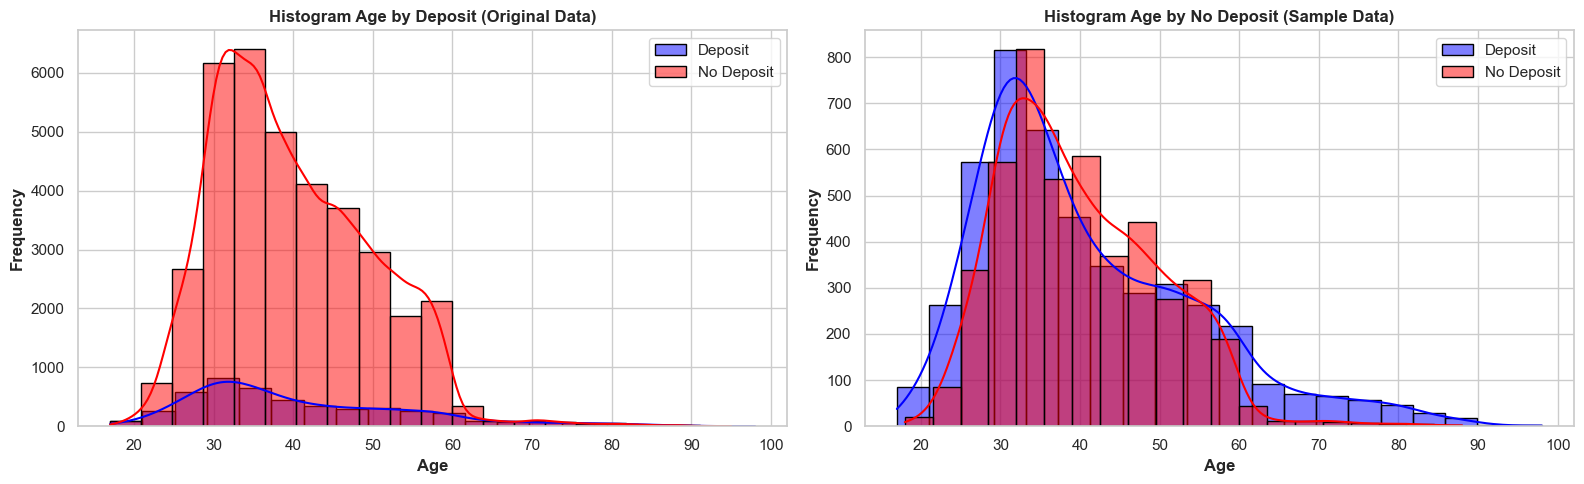

In [13]:
# Define numerical variable and target variable
numerical_variable = 'age'
target_variable = 'deposit'

# Calculate median for each category in the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].median().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(16, 5))

# Subplot for Raw Data
plt.subplot(1, 2, 1)
sns.histplot(deposit_1['age'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['age'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Age by Deposit (Original Data)', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 2, 2)
sns.histplot(deposit_yes['age'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['age'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Age by No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

The two histograms above visualize the distribution of the 'age' variable based on the 'deposit' status from two different data sources: the original data and the proportionally adjusted sample data. In the first histogram, which uses the original data, we observe an age distribution that tends to be non-normal and skewed to the right. However, the proportion of 'yes' deposits is challenging to identify due to significant frequency differences with 'no' deposits.

Meanwhile, the second histogram uses the sample data with adjusted proportions to create a more balanced distribution of deposits. In this graph, the difference in proportions between 'yes' and 'no' deposits becomes clearer, allowing for a better interpretation of the age distribution in the context of deposits.

Upon observing both histograms, there seems to be no significant difference in distribution between them. Based on the test results, it is also stated that the sample data for the 'age' variable can represent the population 'age' data.

Distribution charts help us understand patterns and relationships between categorical variables. However, to better understand the success or effectiveness of a deposit campaign, it's advisable to look at conversion rates across various age groups. Conversion rate refers to the percentage of people in a specific group who successfully make a deposit compared to the total number of people in that group.

CVR, or Conversion Rate, is a metric that measures how successful a marketing action or campaign is in converting users or prospects into customers or achieving other goals. In the context of deposits or other financial products, CVR refers to the percentage of people making a deposit (conversion) compared to the total number of people exposed or involved in that campaign or promotion.

A high CVR interpretation indicates that the campaign or marketing strategy is achieving its goals well, while a low CVR may suggest there are obstacles or challenges that need to be addressed.

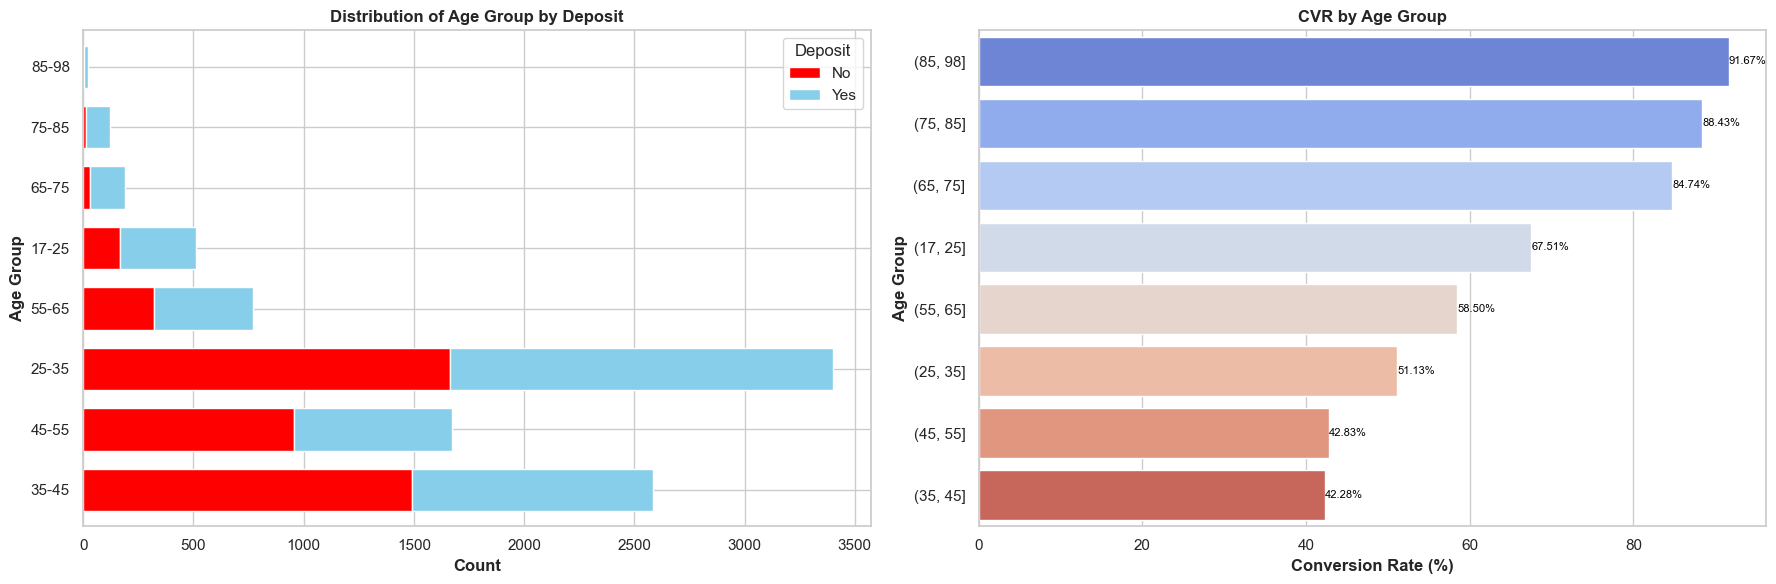

In [14]:
# Define bin order for the age variable
age_bins = [17, 25, 35, 45, 55, 65, 75, 85, 98]

# Create a new column 'age_group' using cut to bin the data
balanced_df['age_group'] = pd.cut(balanced_df['age'], bins=age_bins)

# Create a contingency table with the desired order
contingency_age = pd.crosstab(balanced_df['age_group'], balanced_df['deposit'])

# Convert CategoricalIndex to strings with numeric interval
contingency_age.index = [f'{intv.left}-{intv.right}' for intv in contingency_age.index]

# Calculate the number of conversions and total visitors based on age group
conversion_age = balanced_df.groupby('age_group')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_age['conversion_rate'] = (conversion_age['sum'] / conversion_age['count']) * 100

# Sort by CVR from highest to lowest
conversion_age = conversion_age.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors_age = sns.color_palette("coolwarm", n_colors=len(conversion_age))

# Create figure and axes for subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Define the desired order for the first subplot
desired_order = ['35-45', '45-55', '25-35', '55-65', '17-25', '65-75', '75-85', '85-98']

# Plot stacked bar chart in the first subplot
contingency_age.loc[desired_order].plot(kind='barh', stacked=True, color=['red', 'skyblue'], width=0.7, ax=axes[0])
axes[0].set_title('Distribution of Age Group by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Age Group', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create a horizontal bar plot with percentage values in the second subplot
barplot_age = sns.barplot(x='conversion_rate', y='age_group', data=conversion_age, ci=None, palette=colors_age, ax=axes[1], order=conversion_age['age_group'])
barplot_age.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot_age.set_ylabel('Age Group', fontweight='bold')
barplot_age.set_title('CVR by Age Group', fontweight='bold')

# Add percentage values next to the bars
for index, value in enumerate(conversion_age['conversion_rate']):
    barplot_age.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

In [15]:
# Variable of interest
var_of_interest = 'age_group'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_age)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for age_group: 362.92570159138734
P-value for age_group: 2.1041159248287963e-74
Variable age_group has a significant relationship with deposit (reject H0)


__Insight:__
<br>
1. The 25-35 age group has the highest deposit frequency, while the 17-25 age group has a relatively low deposit frequency. This is a significant difference, even though the age ranges are not that far apart. 
<br>
    It is possible that the 17-25 age group is more interested in riskier investments with the potential for higher returns, such as stocks, mutual funds, cryptocurrencies, and investments in startup businesses. The 25-35 age group, on the other hand, may prefer lower-risk, more stable investments, such as deposits.
<br>
2. The 85-98 age group has the highest deposit conversion rate, reaching 91.67%. This means that 91.67% of all customers who were offered a deposit decided to take it. Although the 25-35 age group has a high frequency of deposits, their conversion rate is not as high, at 51.13%. This suggests that banks may be targeting this age range more heavily for their products. With a much larger number of customers and a conversion rate above 50%, it can be said that banks are doing a good job of offering deposit products to customers.
<br>
There is a slight upward trend in deposit frequency with age. This suggests that older people are more likely to make deposits than younger people.
<br>
3. The results of the Spearman correlation test and the Mann-Whitney statistical test do not show a significant relationship between the age variable and deposit, nor is there a significant difference between the two age groups in terms of deposit.

#### __Job__

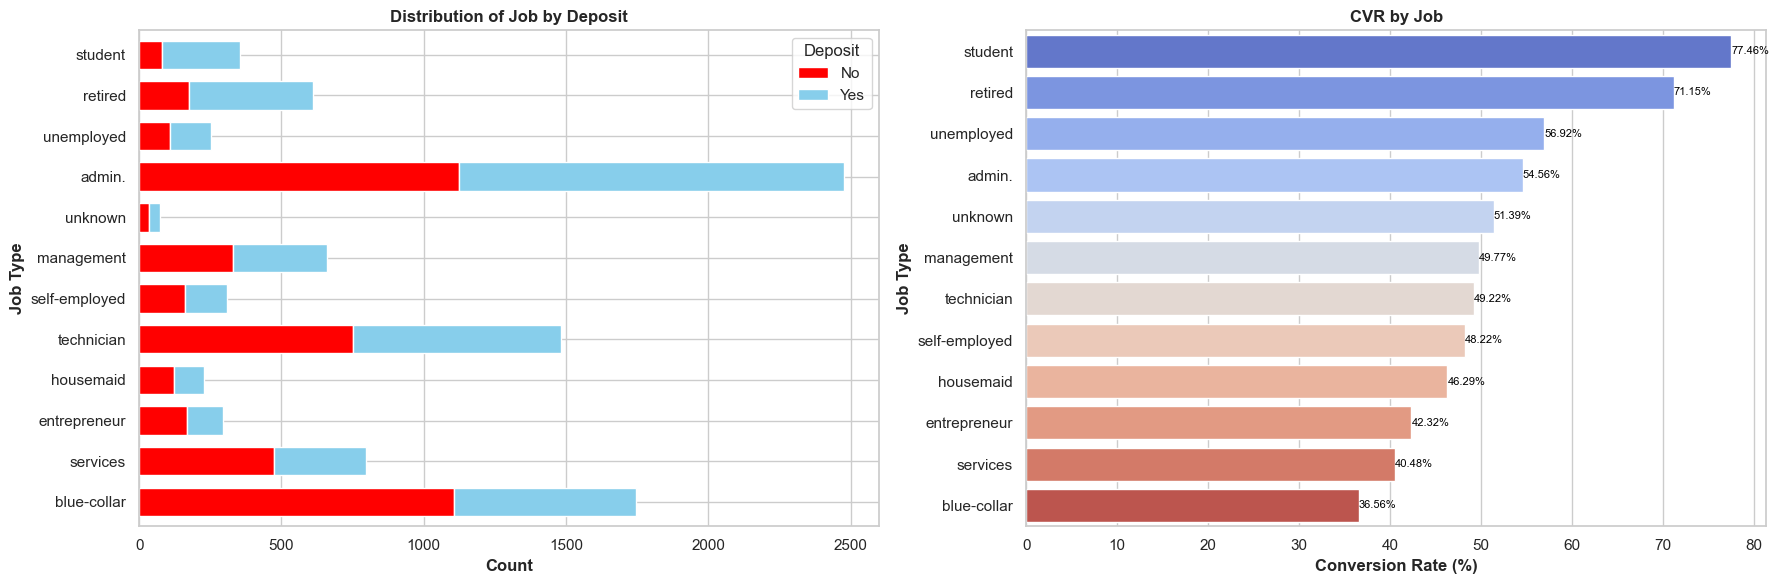

In [16]:
# Define bar order
job_order = ['blue-collar', 'services', 'entrepreneur', 'housemaid', 'technician', 'self-employed', 'management', 'unknown', 'admin.', 'unemployed', 'retired', 'student']

# Create a contingency table with the desired order
contingency_job = pd.crosstab(balanced_df['job'], balanced_df['deposit'])
contingency_job = contingency_job.loc[job_order]

# Calculate the number of conversions and total visitors based on the Job
conversion_job = balanced_df.groupby('job')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_job['conversion_rate'] = (conversion_job['sum'] / conversion_job['count']) * 100

# Sort by CVR
conversion_job = conversion_job.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_job))

# Create figure and axes for subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_job.plot(kind='barh', stacked=True, color=['red', 'skyblue'], width=0.7, ax=axes[0])
axes[0].set_title('Distribution of Job by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Job Type', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create horizontal bar plot with percentage values and custom colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='job', data=conversion_job, ci=None, palette=colors, ax=axes[1])
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Job Type', fontweight='bold')
barplot.set_title('CVR by Job', fontweight='bold')

# Add percentage values next to the bars
for index, value in enumerate(conversion_job['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import chi2_contingency

# Variable of interest
var_of_interest = 'job'

# Creating the contingency table for the selected variable
contingency_jon = pd.crosstab(balanced_df[var_of_interest], balanced_df['deposit'])

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_job)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for job: 405.69797852423085
P-value for job: 3.775009442205058e-80
Variable job has a significant relationship with deposit (reject H0)


__Insight__:
<br>
1. There is a significant association between job type and deposit rate. This means that the likelihood of making a deposit varies depending on the type of job a person holds.
<br>
2. Customers employed as admin. or technicians exhibit the highest deposit rates, with over 50% converting. Students and retired individuals also show relatively high conversion rates, exceeding 70% and 71%, respectively. Unemployed, self-employed, and management personnel have moderate conversion rates, ranging from 48% to 57%. Blue-collar, services, and housemaid categories have the lowest conversion rates, hovering around 40%.
<br>
3. Students stand out with the highest conversion rate of 77.46%, followed by retired individuals at 71.15%. Admin. and technicians maintain consistent conversion rates, both around 49%. Housemaid, self-employed, and management categories show moderate conversion rates, ranging from 46% to 49%. 
<br>
4. The deposit rate is significantly higher for certain types of work. The p-value of the chi-square test of 1.75e-89 shows that there is a strong relationship between the type of work and the deposit rate. This means that the possibility of customers making a deposit is not the same for all types of work.
<br>
5. The overall conversion rate is 49.09%. This means that about half of all job applicants make a deposit.
<br>
<br>

This information can be leveraged to optimize the job application process and enhance deposit conversion rates. For instance:
1. Focus on high-potential groups: Prioritize marketing efforts towards job categories with higher conversion rates, such as students, retired individuals, admin., and technicians.
<br>
2. Tailored messaging and offerings: Adapt marketing messages and product offerings to resonate with the specific needs and interests of each job category.
<br>
3. Targeted outreach strategies: Employ targeted outreach methods, such as personalized email campaigns or social media ads, to reach specific job groups.

By understanding and addressing the job-related variations in conversion rates, businesses can optimize their marketing strategies and enhance their chances of acquiring new customers.

#### __Marital__

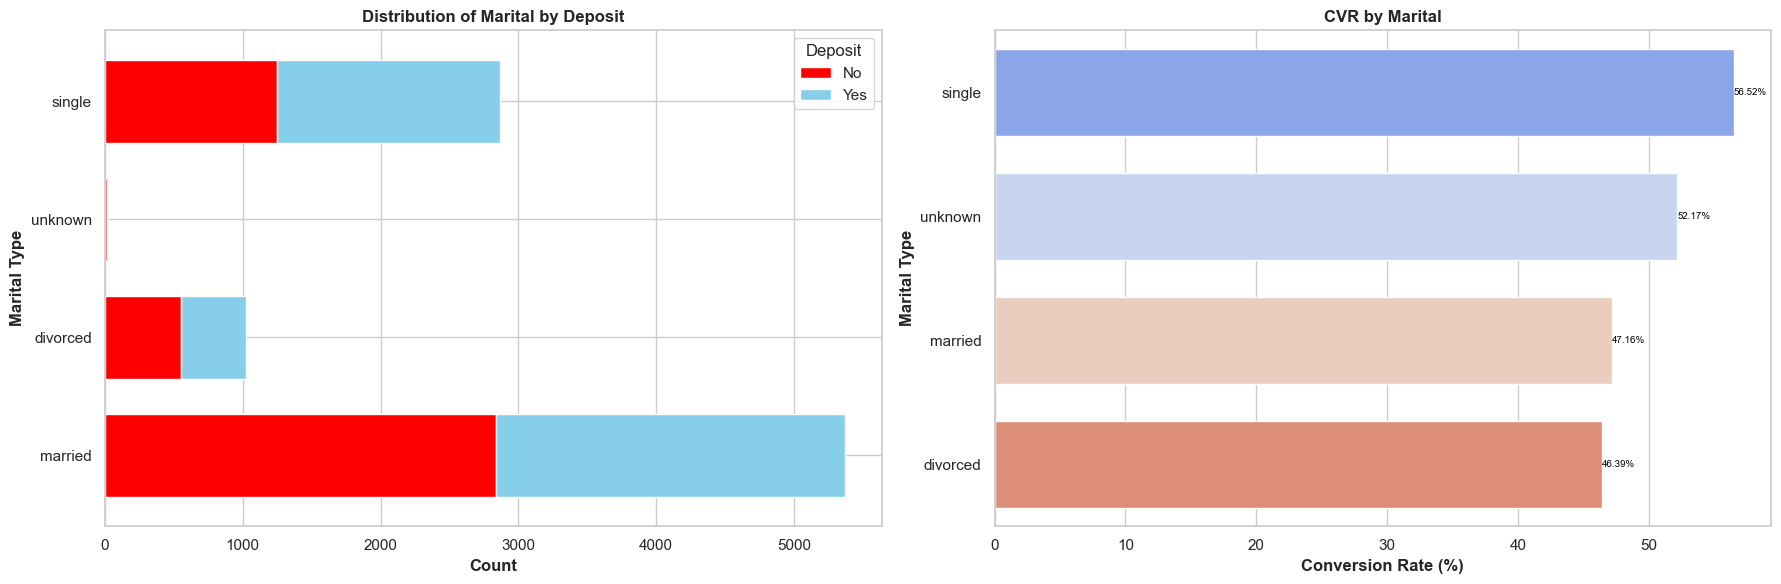

In [18]:
# Define bar order
marital_order = ['married', 'divorced', 'unknown', 'single']

# Create a contingency table with the desired order
contingency_marital = pd.crosstab(balanced_df['marital'], balanced_df['deposit'])
contingency_marital = contingency_marital.loc[marital_order]

# Calculate the number of conversions and total visitors based on the marital
conversion_marital = balanced_df.groupby('marital')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_marital['conversion_rate'] = (conversion_marital['sum'] / conversion_marital['count']) * 100

# Sort by CVR
conversion_marital = conversion_marital.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_marital))

# Create figure and axes for subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_marital.plot(kind='barh', stacked=True, color=['red', 'skyblue'], width=0.7, ax=axes[0])
axes[0].set_title('Distribution of Marital by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Marital Type', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create horizontal bar plot with percentage values and custom colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='marital', data=conversion_marital, ci=None, palette=colors, ax=axes[1], width=0.7)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Marital Type', fontweight='bold')
barplot.set_title('CVR by Marital', fontweight='bold')

# Add percentage values next to the bars
for index, value in enumerate(conversion_marital['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()


In [19]:
# Variable of interest
var_of_interest = 'marital'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_marital)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for marital: 71.51707766554321
P-value for marital: 2.0200351227694813e-15
Variable marital has a significant relationship with deposit (reject H0)


__Insight__:
<br>
1. Single individuals have the highest conversion rate of 56.52%, followed by married individuals at 47.16%.
<br>
This suggests that single individuals may be more open to new products or services and may be more likely to make a deposit. Married individuals may be more cautious about spending and may be more likely to research products before making a purchase.
<br>
2. Divorced individuals have the lowest conversion rate of 46.39%.
<br>
This suggests that divorced individuals may be experiencing financial difficulties or may be more focused on other priorities, such as their children or their own well-being.
<br>
5. Deposit rates are significantly higher for married individuals compared to divorced and single individuals. The chi-square test p-value of 9.07e-16 indicates that there is a strong relationship between marital status and deposit rate. This means that the likelihood of a customer making a deposit is significantly higher for married individuals compared to divorced and single individuals.
<br>

These insights can be used to increase deposit rates. For example we can target marketing them based on their marital status, like:
<br>
1. Target single individuals with messaging that highlights the benefits of your products or services for their lifestyle.
This could include messaging that emphasizes convenience, affordability, or personal fulfillment.
<br>
2. Target married individuals with messaging that focuses on the long-term benefits of your products or services for their families.
This could include messaging that emphasizes financial stability, security, or peace of mind.
<br>
3. Target divorced individuals with messaging that is sensitive to their situation and offers solutions to their specific needs.
This could include messaging that emphasizes affordability, ease of use, or customer support.

#### __Education__

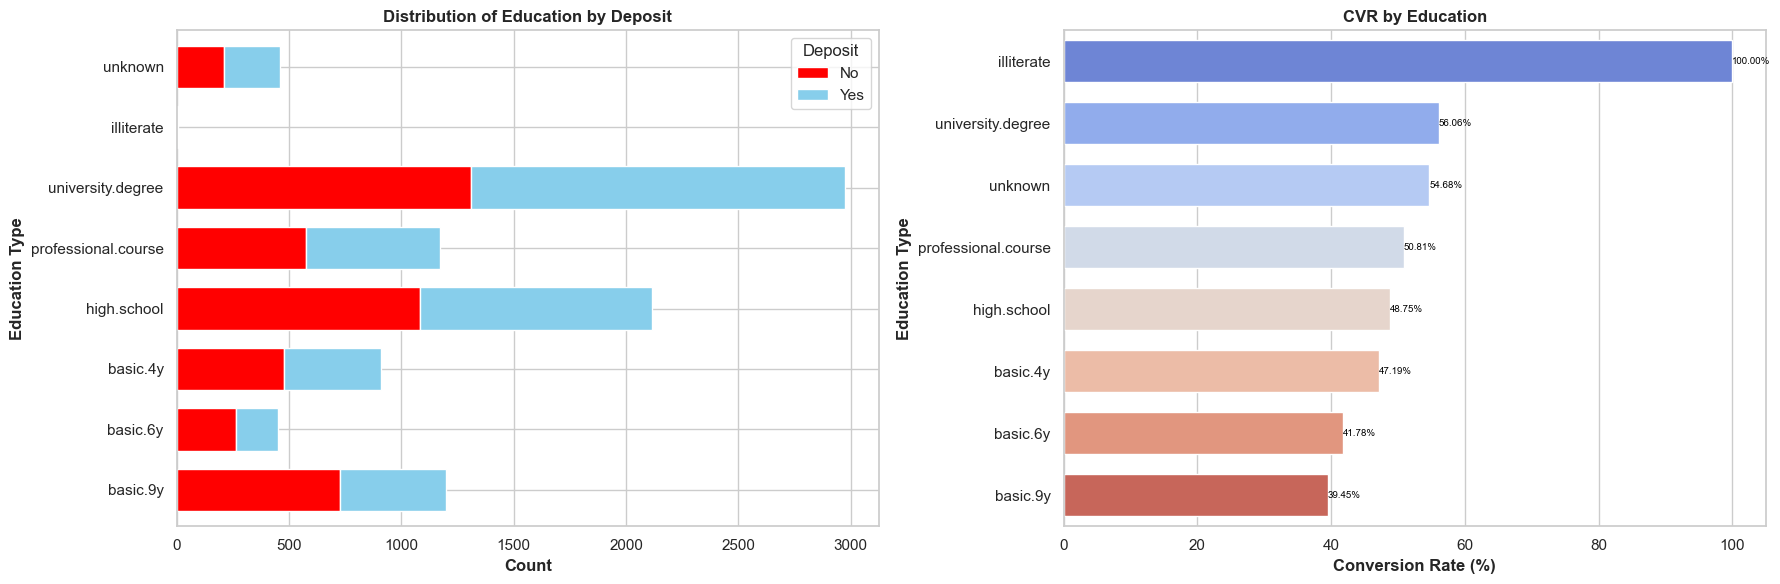

In [20]:
# Define bar order
education_order = ['basic.9y', 'basic.6y', 'basic.4y', 'high.school', 'professional.course', 'university.degree', 'illiterate', 'unknown']

# Create a contingency table with the desired order
contingency_education = pd.crosstab(balanced_df['education'], balanced_df['deposit'])
contingency_education = contingency_education.loc[education_order]

# Calculate the number of conversions and total visitors based on the education
conversion_education = balanced_df.groupby('education')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_education['conversion_rate'] = (conversion_education['sum'] / conversion_education['count']) * 100

# Sort by CVR
conversion_education = conversion_education.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_education))

# Create figure and axes for subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_education.plot(kind='barh', stacked=True, color=['red', 'skyblue'], width=0.7, ax=axes[0])
axes[0].set_title('Distribution of Education by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Education Type', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create horizontal bar plot with percentage values and custom colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='education', data=conversion_education, ci=None, palette=colors, ax=axes[1], width=0.68)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Education Type', fontweight='bold')
barplot.set_title('CVR by Education', fontweight='bold')

# Add percentage values next to the bars
for index, value in enumerate(conversion_education['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()

In [21]:
# Variable of interest
var_of_interest = 'education'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_education)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for education: 121.86089184239682
P-value for education: 3.13791560754246e-23
Variable education has a significant relationship with deposit (reject H0)


__Insight__:
<br>
1. University degree holders stand out with the highest conversion rate of 56.06%, followed by professional course graduates at 50.81%. High school graduates have a conversion rate of 48.82%. The conversion rates for basic education (6 years or less) vary from 39.45% to 47.19%.
<br>
2. Deposit rates are significantly higher for individuals with higher levels of education. 
<br>
3. The chi-square test p-value of 1.48e-22 indicates that there is a strong relationship between education level and deposit rate. This means that the likelihood of a customer making a deposit is significantly higher for individuals with higher levels of education, such as those with university degrees or professional courses, compared to those with lower levels of education, such as those with basic education or no education.
<br>

We could focus on marketing to individuals with higher levels of education. We could also develop targeted outreach campaigns for each education level, such as:
<br>
1. Education Level Targeting: Prioritize marketing efforts towards customer segments with higher conversion rates, such as university degree holders and professional course graduates.
<br>
2. Tailored Messaging: Segment customer lists based on education level and tailor messaging to resonate with each segment's specific needs and preferences.
<br>
3. Higher Education Engagement: Engage with customers pursuing higher education through targeted outreach campaigns, such as partnerships with universities or online education platforms.
<br>
4. Educational Attainment Emphasis: Highlight the benefits of higher education and the potential for career advancement in marketing messages.

__Summary Statistics Table__

| Chi-Squaare  | Job         | Marital        | Education     | Age |
|--------------|-------------|----------------|---------------|---|
| U-statistic  | 405.69     | 71.51       | 121.86       | 362.93 |
|   P-value    | 0.00        | 0.00           | 0.00          | 0.00 |
|  Hipotesis   | Reject HO  | Reject HO      | Reject HO     | Reject HO  |
|   Relationship   | Significant  | Significant     | Significant    | Significant |

__Conclusion__: 
<br>
The statistic reveals a significant association between all examined variables—age, job, marital status, and education—and the target variable. As a result, these variables will be included as features in the modeling process.

### <mark>__2. Contact History and Campaign.__</mark> (Contact, Month, Day of Week, Duration, Campaign, Previous days, Previous Contact, Previous Outcome)

#### __Contact__

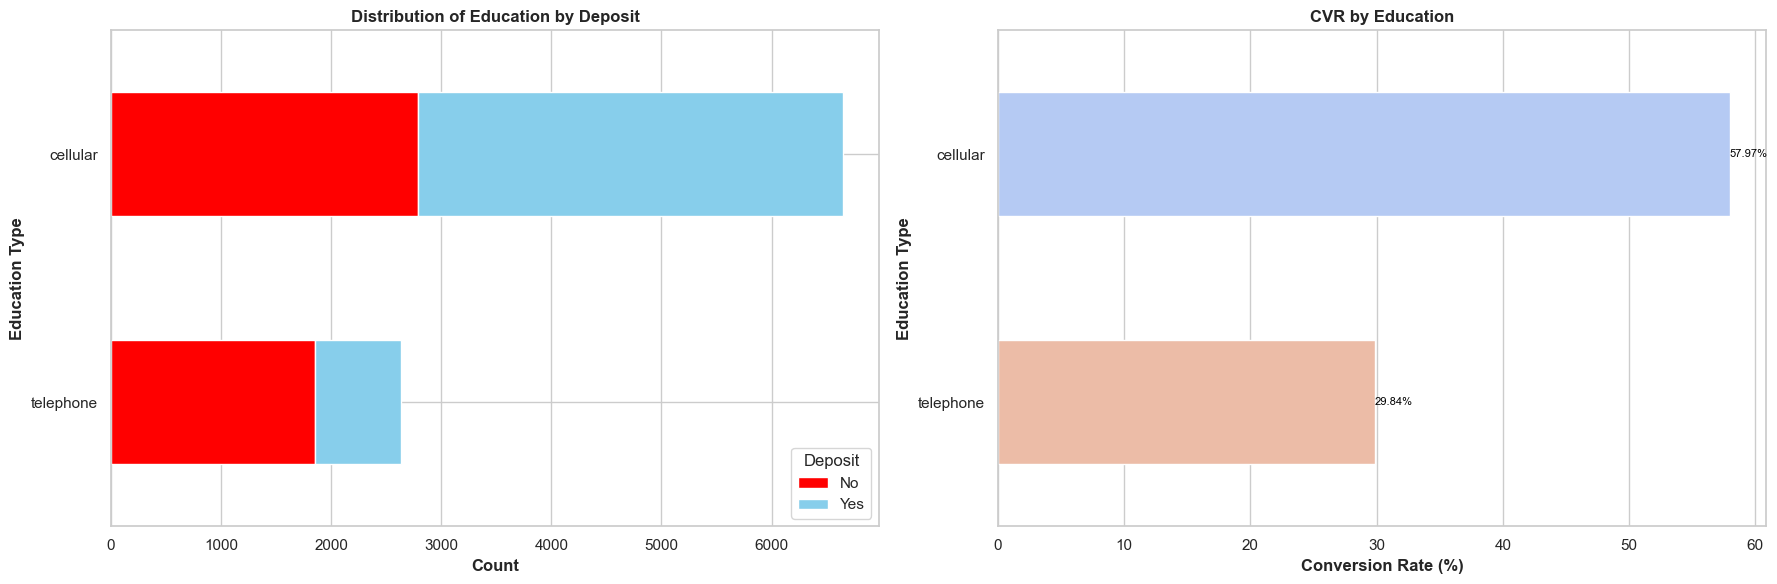

In [22]:
# Define bar order
contact_order = ['telephone', 'cellular']

# Create a contingency table with the desired order
contingency_contact = pd.crosstab(balanced_df['contact'], balanced_df['deposit'])
contingency_contact = contingency_contact.loc[contact_order]

# Calculate the number of conversions and total visitors based on the contact
conversion_contact = balanced_df.groupby('contact')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_contact['conversion_rate'] = (conversion_contact['sum'] / conversion_contact['count']) * 100

# Sort by CVR
conversion_contact = conversion_contact.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_contact))
bar_width = 0.5

# Create figure and axes for subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_contact.plot(kind='barh', stacked=True, color=['red', 'skyblue'], ax=axes[0], width=bar_width)
axes[0].set_title('Distribution of Education by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Education Type', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create horizontal bar plot with percentage values and custom colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='contact', data=conversion_contact, ci=None, palette=colors, ax=axes[1], width=bar_width)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Education Type', fontweight='bold')
barplot.set_title('CVR by Education', fontweight='bold')

# Add percentage values next to the bars
for index, value in enumerate(conversion_contact['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

In [23]:
# Variable of interest
var_of_interest = 'contact'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_contact)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for contact: 596.1501148730598
P-value for contact: 1.1512884276804354e-131
Variable contact has a significant relationship with deposit (reject H0)


__Insight__:
<br>
1. The data clearly demonstrates a significant relationship between contact type and deposit behavior. Customers with cellular phones tend to have higher conversion rates compared to those with telephone connections.
<br>
People are more likely to use cellular phones than traditional landline phones for several reasons:
<br>
    1. Portability and mobility: Cellular phones allow users to make and receive calls from anywhere within their carrier's coverage area, providing flexibility and convenience. (source: https://www.linkedin.com/pulse/my-country-mobile-voip-vs-cellular-10-reasons-provides/)
    2. Cost-effectiveness: Cellular phone plans often offer competitive pricing and calling options compared to traditional landline services. (source:https://utilitiesone.com/are-traditional-phone-plans-becoming-obsolete-in-the-age-of-wireless-data)
<br>

Based on the insights gained from the data, businesses can implement targeted marketing strategies to optimize customer acquisition and engagement:
<br>
    1. Prioritize cellular phone outreach: Focus marketing efforts on customer segments with higher conversion rates, such as cellular phone users.
<br>
    2. Tailored messaging: Segment customer lists based on contact type and tailor messaging to resonate with each segment's specific preferences and usage patterns.
<br>
    3. Mobile-first approach: Optimize marketing campaigns and website design for mobile devices to cater to the preferences of cellular phone users.
<br>
    4. Personalized communication: Personalize marketing messages based on customer data and preferences to enhance engagement and conversion rates.
<br>
    5. Multi-channel approach: Utilize a combination of communication channels, including SMS, push notifications, and email, to reach customers effectively.

#### __Month__

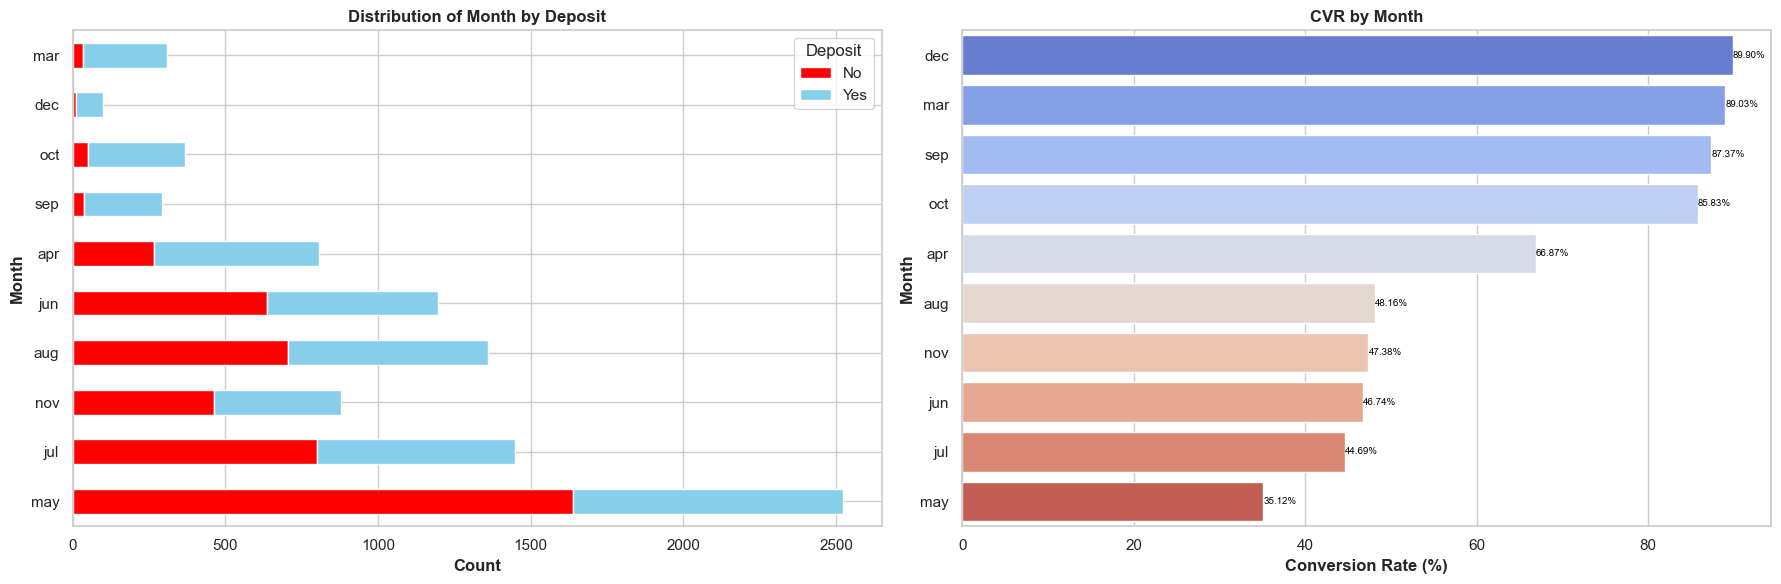

In [24]:
# Define bar order
month_order = ['may', 'jul', 'nov', 'aug', 'jun', 'apr', 'sep', 'oct', 'dec', 'mar']

# Create a contingency table with the desired order
contingency_month = pd.crosstab(balanced_df['month'], balanced_df['deposit'])
contingency_month = contingency_month.loc[month_order]

# Calculate the number of conversions and total visitors based on the month
conversion_month = balanced_df.groupby('month')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_month['conversion_rate'] = (conversion_month['sum'] / conversion_month['count']) * 100

# Sort by CVR
conversion_month = conversion_month.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_month))

# Create figure and axes for subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_month.plot(kind='barh', stacked=True, color=['red', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribution of Month by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Month', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create horizontal bar plot with percentage values and custom colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='month', data=conversion_month, ci=None, palette=colors, ax=axes[1])
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Month', fontweight='bold')
barplot.set_title('CVR by Month', fontweight='bold')

# Add percentage values next to the bars
for index, value in enumerate(conversion_month['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()


In [25]:
# Variable of interest
var_of_interest = 'month'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_month)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for month: 945.1422312765106
P-value for month: 1.1566038370328549e-197
Variable month has a significant relationship with deposit (reject H0)


__Insight__:
<br>
1. May has the highest number of calls, followed by July and November.
<br>
2. December has the highest conversion rate, indicating that calls made in December are more likely to result in a successful outcome. Followed by March.

May, despite having the highest number of calls, has a lower conversion rate compared to other months.
<br>

Based on these insights, businesses can implement targeted marketing strategies to optimize customer acquisition and engagement:
<br>
1. Focus on high-conversion months: Prioritize marketing efforts during December, March, and September, as these months exhibit the highest conversion rates.
<br>
2. Seasonal messaging: Tailor marketing messages to resonate with the specific characteristics and sentiment associated with each month. For instance, emphasize holiday themes in December or back-to-school promotions in September.
<br>
3. Event-driven campaigns: Plan and align marketing campaigns with relevant holidays, events, or observances that occur during high-conversion months. This could include special offers or promotions tied to these events.

#### __Day of Week__

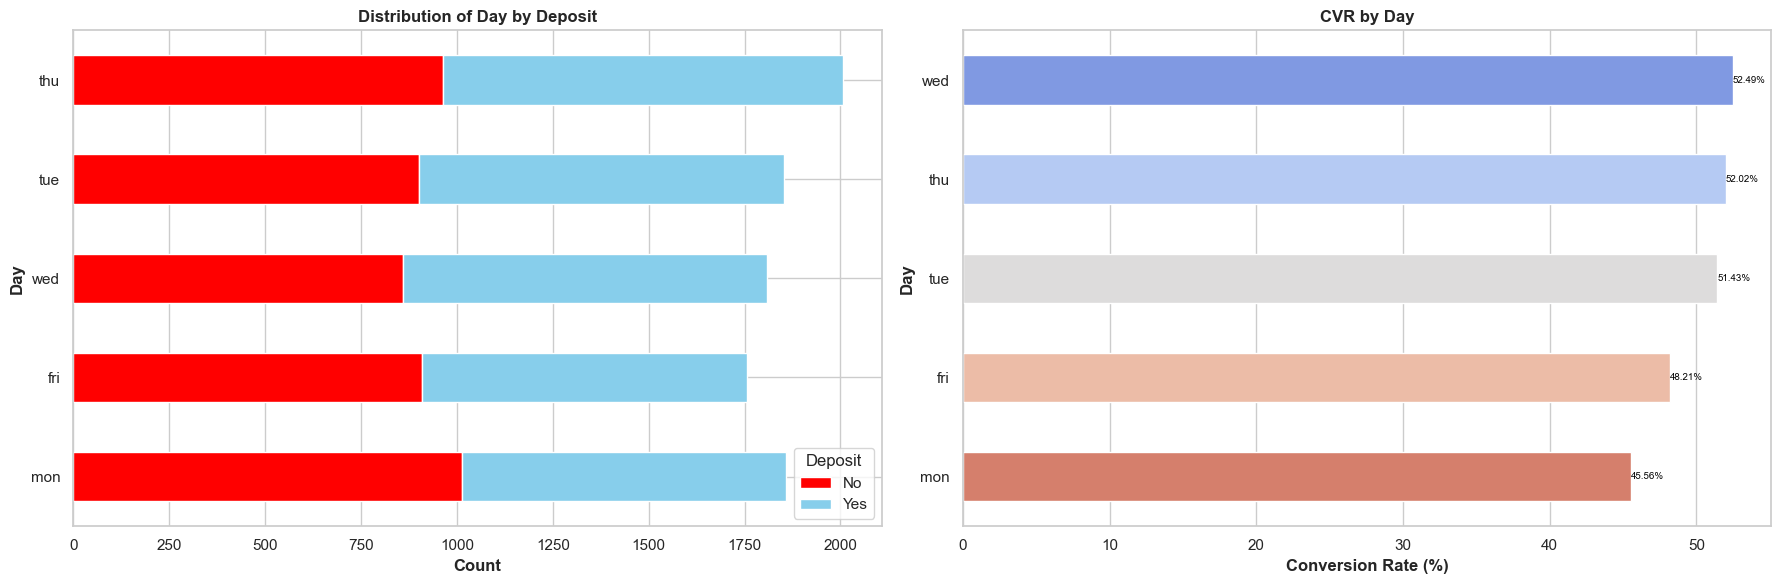

In [26]:
# Define bar order
day_order = ['mon', 'fri', 'wed', 'tue', 'thu']

# Create a contingency table with the desired order
contingency_day = pd.crosstab(balanced_df['day_of_week'], balanced_df['deposit'])
contingency_day = contingency_day.loc[day_order]

# Calculate the number of conversions and total visitors based on the day
conversion_day = balanced_df.groupby('day_of_week')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_day['conversion_rate'] = (conversion_day['sum'] / conversion_day['count']) * 100

# Sort by CVR
conversion_day = conversion_day.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_day))

# Create figure and axes for subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_day.plot(kind='barh', stacked=True, color=['red', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribution of Day by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Day', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create horizontal bar plot with percentage values and custom colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='day_of_week', data=conversion_day, ci=None, palette=colors, ax=axes[1], width=0.5)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Day', fontweight='bold')
barplot.set_title('CVR by Day', fontweight='bold')

# Add percentage values next to the bars
for index, value in enumerate(conversion_day['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()

In [27]:
# Variable of interest
var_of_interest = 'day_of_week'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_day)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for day_of_week: 26.169856890390673
P-value for day_of_week: 2.924438045053739e-05
Variable day_of_week has a significant relationship with deposit (reject H0)


__Insight__:
<br>
1. Wednesday (52.49%) has the highest number of calls, followed closely by Thursday (52.02%) and Tuesday (51.43%).
<br>
2. Wednesday has the highest conversion rate, indicating that calls made on Wednesdays are more likely to result in a successful outcome. Monday, despite having a relatively high number of calls, has a lower conversion rate compared to other days.
<br>

Based on these insights, businesses can implement targeted marketing strategies to optimize customer acquisition and engagement:
<br>
1. Focus on high-conversion days: Prioritize marketing efforts on Wednesdays, Thursdays, and Tuesdays, as these days exhibit the highest conversion rates.
<br>
2. Tailor messaging: Adapt marketing messages to align with the specific characteristics and activities associated with each day of the week. For instance, emphasize work-life balance themes on Wednesdays or weekend getaway promotions on Fridays.
<br>
3. Optimize call timing: Analyze the timing of calls within each day of the week to determine if there are optimal periods for reaching customers with higher conversion potential.
<br>
4. Day-specific promotions: Consider offering exclusive promotions or incentives on specific days of the week, such as "Wednesday Wellness Deposit Bonuses" or "Thursday Travel Deposit Rewards."

#### __Duration__

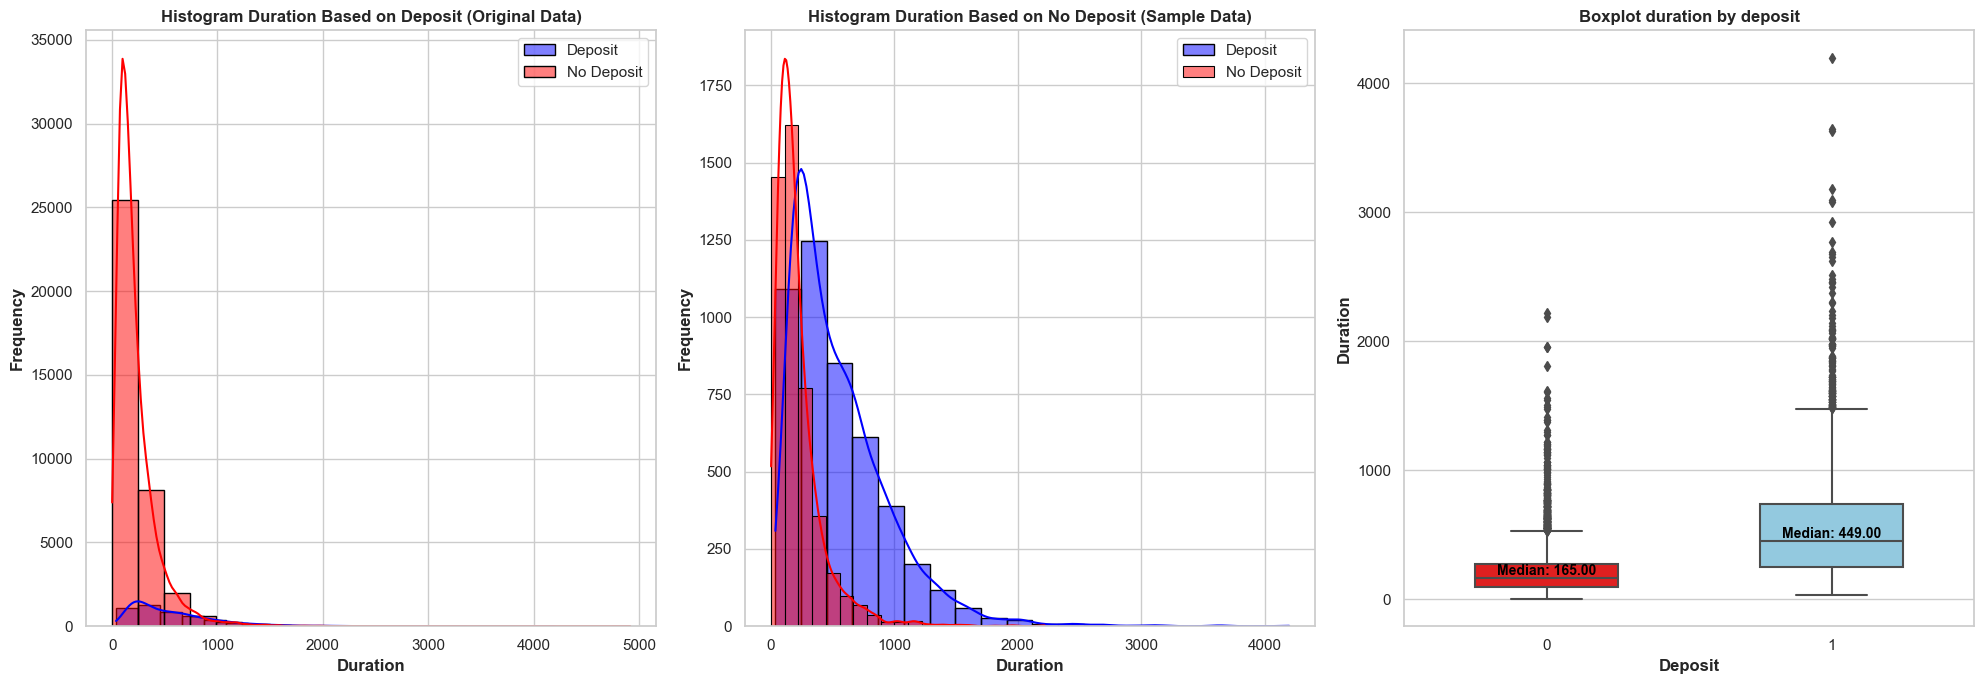

In [28]:
# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['duration'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['duration'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Duration Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Duration', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['duration'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['duration'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Duration Based on No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Duration', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Boxplot
plt.subplot(1, 3, 3)
target_variable = 'deposit'
numerical_variable = 'duration'
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

It can be observed that the distribution of the raw data and the sampled data is quite similar, and the histogram displays a right-skewed shape. Therefore, it can be concluded that the data is not normally distributed. And the fact that both the raw data and sample data exhibit similar distributions indicates that the sampling process has not significantly altered the distribution of "duration."
<br>
Deposit customers tend to have longer call durations than non-deposit customers. This is evident from the boxplot, which shows that the median duration of calls for deposit customers is higher than for non-deposit customers.

In [29]:
from scipy.stats import spearmanr

# Calculate Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['duration'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpretation of the results
if p_value < 0.05:  # take a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject the hypothesis of no significant correlation.")

Spearman Correlation Coefficient: 0.5570623344789548
P-Value: 0.0
Significant positive correlation.


In [30]:
variable = 'duration'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(balanced_df[balanced_df[target_variable] == 0][variable], balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Mann-Whitney U test between {variable} and {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

Mann-Whitney U test between duration and deposit:
U-statistic: 3842113.0
P-value: 0.0
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
<br>
1. The Spearman's correlation coefficient measures the strength and direction of the association between two ranked variables. In this case, it indicates a moderate positive correlation between call duration and deposit outcome (0.557). This means that there is a tendency for longer calls to be associated with a higher likelihood of making a deposit.
<br>
2. The Mann-Whitney U test is a non-parametric statistical test used to compare the distributions of two groups. In this case, it compares the distribution of call duration between customers who made a deposit and those who did not. The U-statistic of 3842113.0 and a p-value of 0.0 indicate a statistically significant difference in call duration between the two groups. This means that the distribution of call duration is different for deposit customers and non-deposit customers.
<br>

Based on these statistical results, there is evidence to suggest that call duration can be a factor influencing deposit outcomes. Longer calls may provide more opportunities for sales representatives to address customer concerns, build rapport, and persuade them to make a deposit.
<br>
Here are some suggestions for on these insights:
<br>
1. Prioritize call duration: Encourage sales representatives to invest more time in calls with potential deposit customers. This could involve providing additional training on handling complex conversations and addressing customer objections.
<br>
2. Monitor call duration metrics: Track and analyze call duration data to identify trends and correlations with deposit outcomes. This information can be used to refine sales strategies and training programs.
<br>
3. Segment customers based on call duration: Segment customers based on their call duration to tailor marketing and sales approaches accordingly. For instance, customers with longer call durations may require more personalized follow-up or additional information.

(source: https://search.proquest.com/openview/150846863239439101a87d57bf6aeb66/1?pq-origsite=gscholar&cbl=6286)

#### __Campaign__

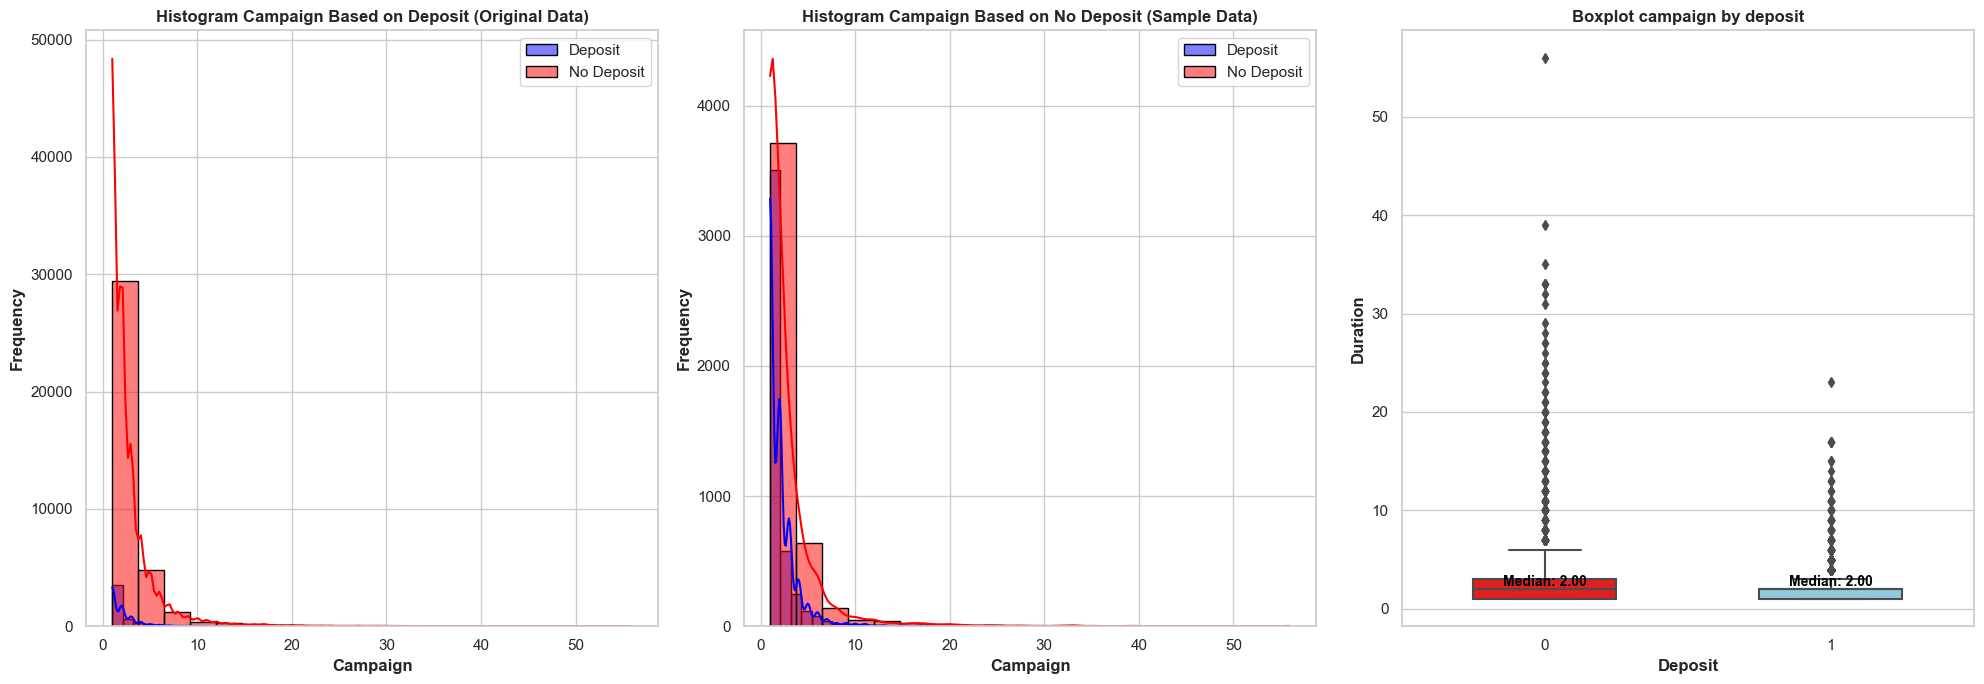

In [31]:
# Determine numerical variable and target variable
numerical_variable = 'campaign'
target_variable = 'deposit'

# Calculate median for each category on the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].median().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['campaign'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['campaign'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Campaign Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Campaign', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['campaign'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['campaign'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Campaign Based on No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Campaign', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Boxplot
plt.subplot(1, 3, 3)
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

Even though the 'campaign' distribution is a bit skewed to the right, the fact that the median values are similar suggests that, on average, the number of contacts in the campaign doesn't differ much between those who make a deposit and those who don't. It indicates that the impact of the 'campaign' variable on the likelihood of making a deposit is not drastically different between the two groups. To confirm this, we'll conduct a correlation test using spearman.

In [32]:
# Calculate the Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['campaign'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpretation of the results
if p_value < 0.05:  # take a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject that there is no significant correlation.")

Spearman Correlation Coefficient: -0.10027024249682111
P-Value: 3.5450972459186597e-22
Significant negative correlation.


In [33]:
variable = 'campaign'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(balanced_df[balanced_df[target_variable] == 0][variable], balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha level)
alpha = 0.05

# Print the results
print(f"Mann-Whitney U test between {variable} and {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

Mann-Whitney U test between campaign and deposit:
U-statistic: 11941690.0
P-value: 4.46625510467569e-22
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
<br>
There is a significant negative correlation between the variables based on the Spearman correlation. This suggests that a higher volume of contacts may not necessarily lead to increased deposits and may even have an adverse effect.
<br>
<br>
There are several possible explanations for this phenomenon:
1. Over-saturation and Contact Fatigue: Repeated campaign from a company can lead to customer fatigue and resentment, making them less receptive to the company's message and less likely to make a deposit.
2. Diminishing Marginal Returns: The law of diminishing marginal returns suggests that as the number of contacts increases, the additional impact on conversion rates diminishes. This means that while initial contacts may be effective in raising awareness and interest, subsequent contacts may have little or no impact, or even a negative impact.
3. Targeting Inefficiency: A high volume of contacts may indicate that the company is not targeting its marketing efforts effectively. Reaching out to a large number of unqualified or uninterested individuals can lead to wasted resources and a decrease in overall conversion rates.
4. Customer Perception and Trust: Excessive contact can be perceived as intrusive or pushy, damaging the customer's perception of the company and reducing their trust. This can lead to a reluctance to engage with the company and make a deposit.
5. Context and Relevance: The context and relevance of the contacts can also play a role. If the contacts are not personalized, relevant to the customer's needs, or delivered at the right time, they are less likely to be effective and may even annoy the customer.

    source :
    (https://www.sid.ir/paper/1049471/en, https://www.lianatech.com/resources/blog/case-how-we-measured-the-effectiveness-of-5-marketing-channels-using-utm-parameters.html)


#### __Previous Days__

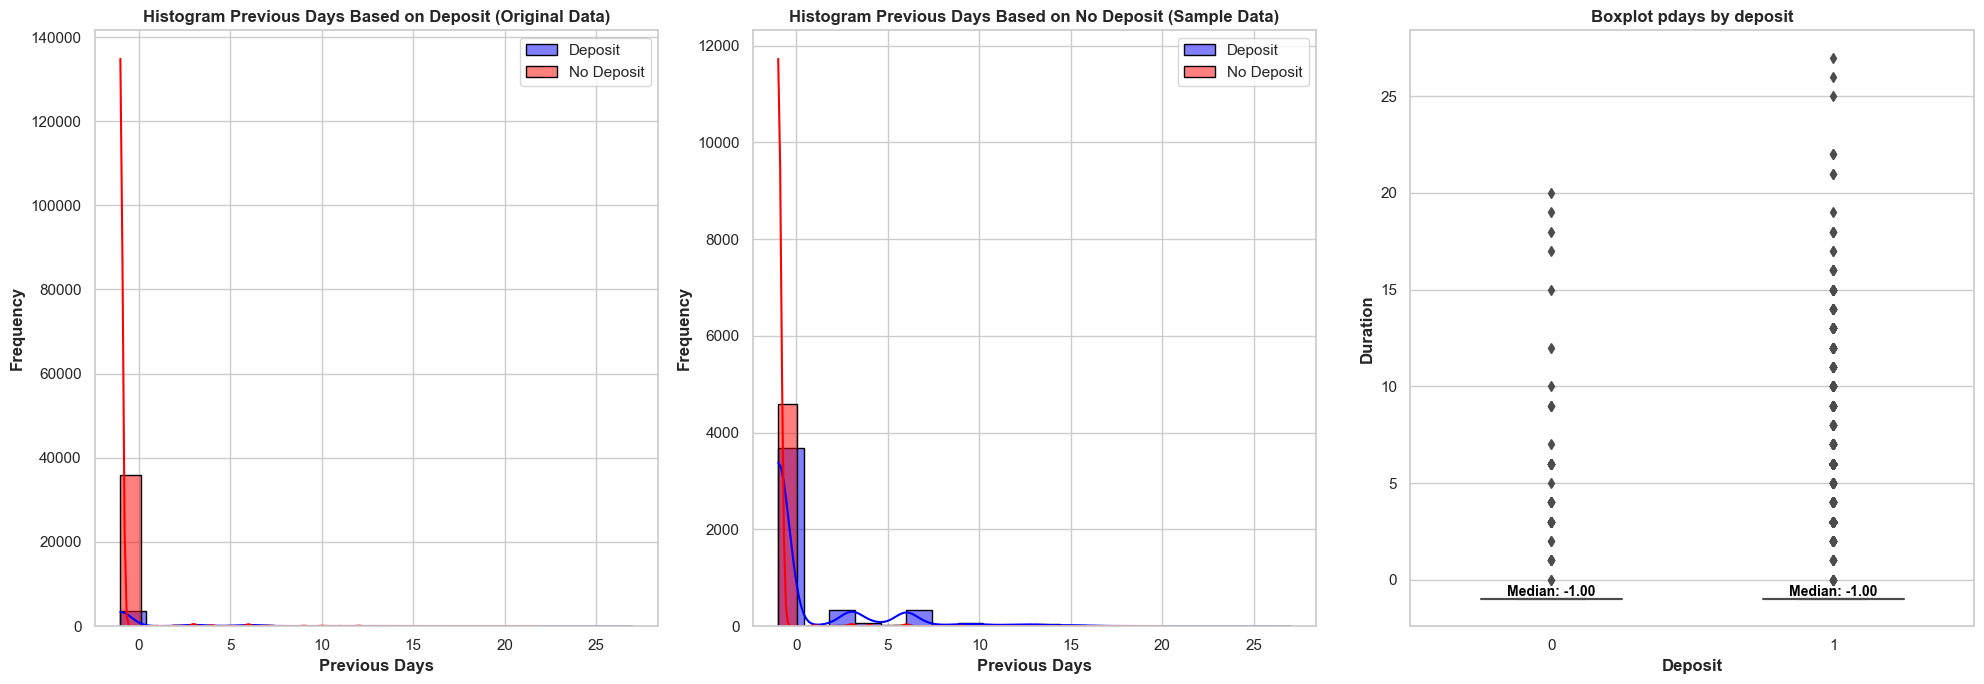

In [34]:
# Determine numerical variable and target variable
numerical_variable = 'pdays'
target_variable = 'deposit'

# Calculate median for each category on the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].median().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['pdays'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['pdays'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Days Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Previous Days', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['pdays'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['pdays'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Days Based on No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Previous Days', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Boxplot
plt.subplot(1, 3, 3)
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

The left-skewed distribution suggests that the majority of customers were contacted relatively recently. The fact that both the raw data and sample data exhibit similar distributions indicates that the sampling process has not significantly altered the distribution of "previous days."
<br>
The preponderance of the value -1 in the "previous days" variable, which represents the number of days since the last contact, suggests that this value is likely used to denote cases where there was no previous contact. The identical medians for both deposit and non-deposit might suggest that the recency of contact does not differentiate significantly between customers who make deposits and those who do not.

In [35]:
# Calculating Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['pdays'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpreting the results
if p_value < 0.05:  # using a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject the null hypothesis of no significant correlation.")

Spearman Correlation Coefficient: 0.3111631103482212
P-Value: 1.629305919018973e-207
Significant positive correlation.


In [36]:
variable = 'pdays'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(balanced_df[balanced_df[target_variable] == 0][variable], balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Mann-Whitney U test between {variable} and {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

Mann-Whitney U test between pdays and deposit:
U-statistic: 8661587.5
P-value: 1.9688057744184578e-197
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
<br>
The results based on spearman correlation,  there is a statistically significant weak positive correlation between the two variables under consideration. While the correlation is not very strong, it provides evidence that changes in one variable are associated with changes in the other. In this case, the coefficient is positive, indicating a upward trend.



#### __Previous Contact__

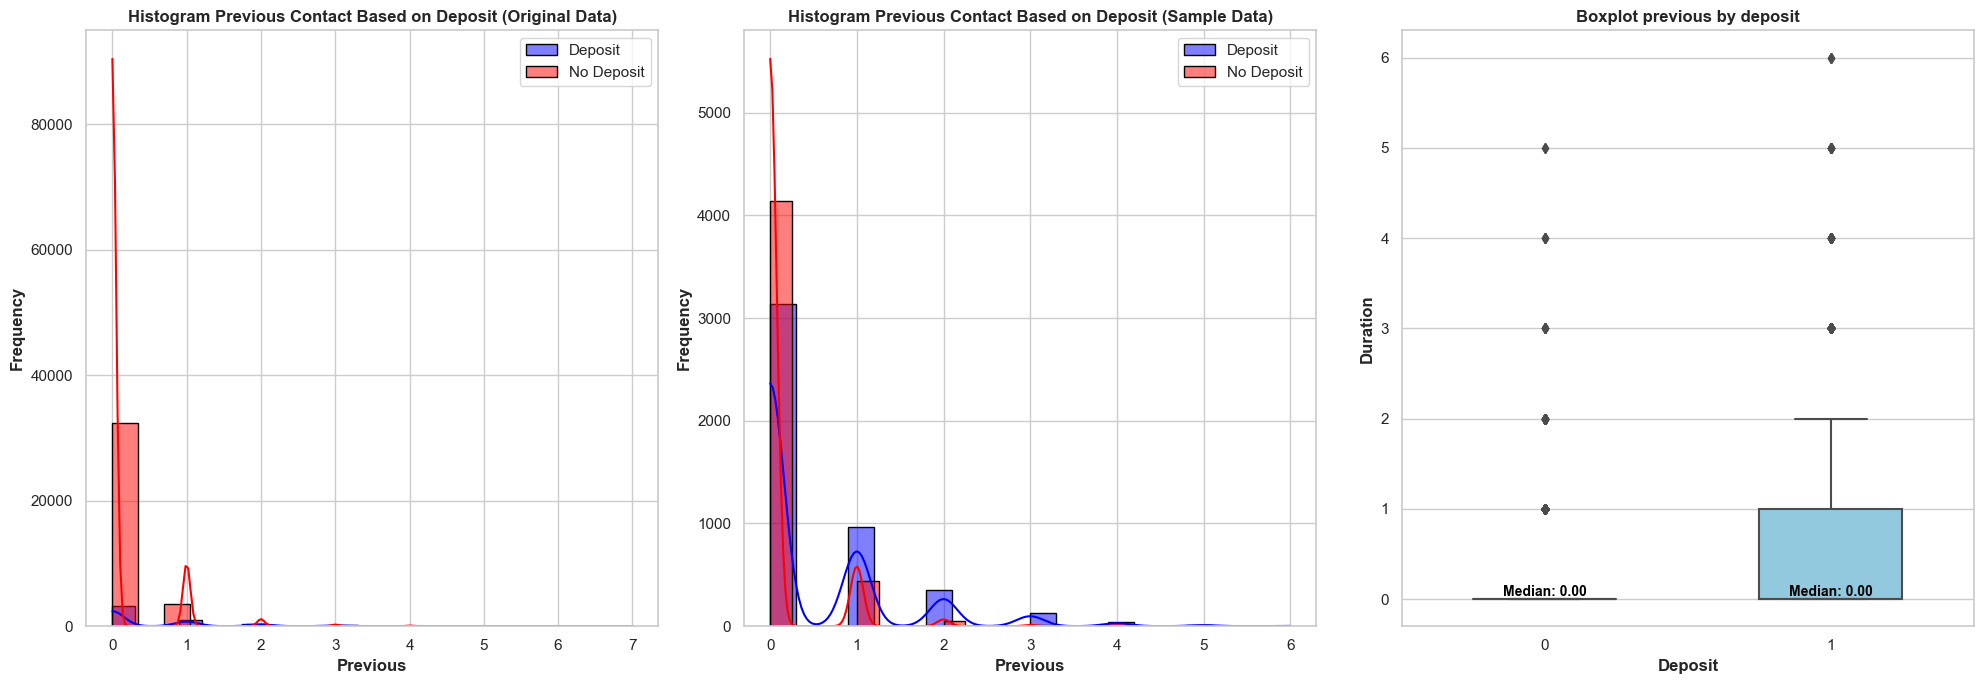

In [37]:
# Determine numerical variable and target variable
numerical_variable = 'previous'
target_variable = 'deposit'

# Calculate median for each category on the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].median().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['previous'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['previous'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Contact Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Previous', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['previous'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['previous'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Previous Contact Based on Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Previous', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Boxplot
plt.subplot(1, 3, 3)
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Both histograms indicate that the distribution of the 'previous' variable tends to be skewed to the right. This suggests that the majority of 'previous' values are relatively low, with a few values being very high. The similar distribution between raw data and sample data suggests that the sampling is adequate in representing the population distribution. 
<br>
Similar medians between deposit and no deposit groups indicate that, at the middle of the distribution, 'previous' is unlikely to be a significant determinant between customers who made a deposit and those who did not.

In [38]:
# Calculating Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['previous'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpreting the results
if p_value < 0.05:  # using a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject the null hypothesis of no significant correlation.")

Spearman Correlation Coefficient: 0.26983720234373093
P-Value: 1.3957555170008619e-154
Significant positive correlation.


In [39]:
variable = 'previous'
target_variable = 'deposit'
statistic, p_value = mannwhitneyu(balanced_df[balanced_df[target_variable] == 0][variable], balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Mann-Whitney U test between {variable} and {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

Mann-Whitney U test between previous and deposit:
U-statistic: 8364674.5
P-value: 5.559481225747802e-149
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
<br>
The Spearman correlation coefficient for the given data is approximately 0.27, and the p-value is very close to zero (1.39e-154). These results indicate a significant positive correlation between the variables under consideration. With a significant positive correlation, the interpretation is that as the value of one variable increases, the value of the other variable is also likely to increase.

Here are some possible explanations for the significant positive correlation between previous contacts and deposit likelihood:

1. Building Customer Relationships: Multiple contacts over time allow companies to build stronger relationships with potential customers, fostering trust, familiarity, and brand loyalty. This can increase the likelihood of customers making a deposit when the time is right.

2. Reinforcing Brand Message: Repeated exposure to the company's brand message and value proposition can enhance brand awareness, recognition, and recall. This can make potential customers more receptive to the company's offers and more likely to make a deposit when presented with an opportunity.

3. Nurturing Customer Interest: Consistent communication and engagement can help keep potential customers interested in the company's offerings and maintain their consideration set. This can increase the likelihood of customers making a deposit when they are ready to make a purchase decision.

4. Addressing Customer Concerns: Multiple contacts provide opportunities for companies to address potential customers' questions, concerns, and objections. This can alleviate customer hesitation and increase the likelihood of them making a deposit.

5. Personalization and Relevance: With more contacts, companies can gather more data about potential customers' preferences, needs, and buying behaviors. This allows for personalization of messages and offers, making them more relevant and appealing to individual customers.


#### __Previous Outcome__

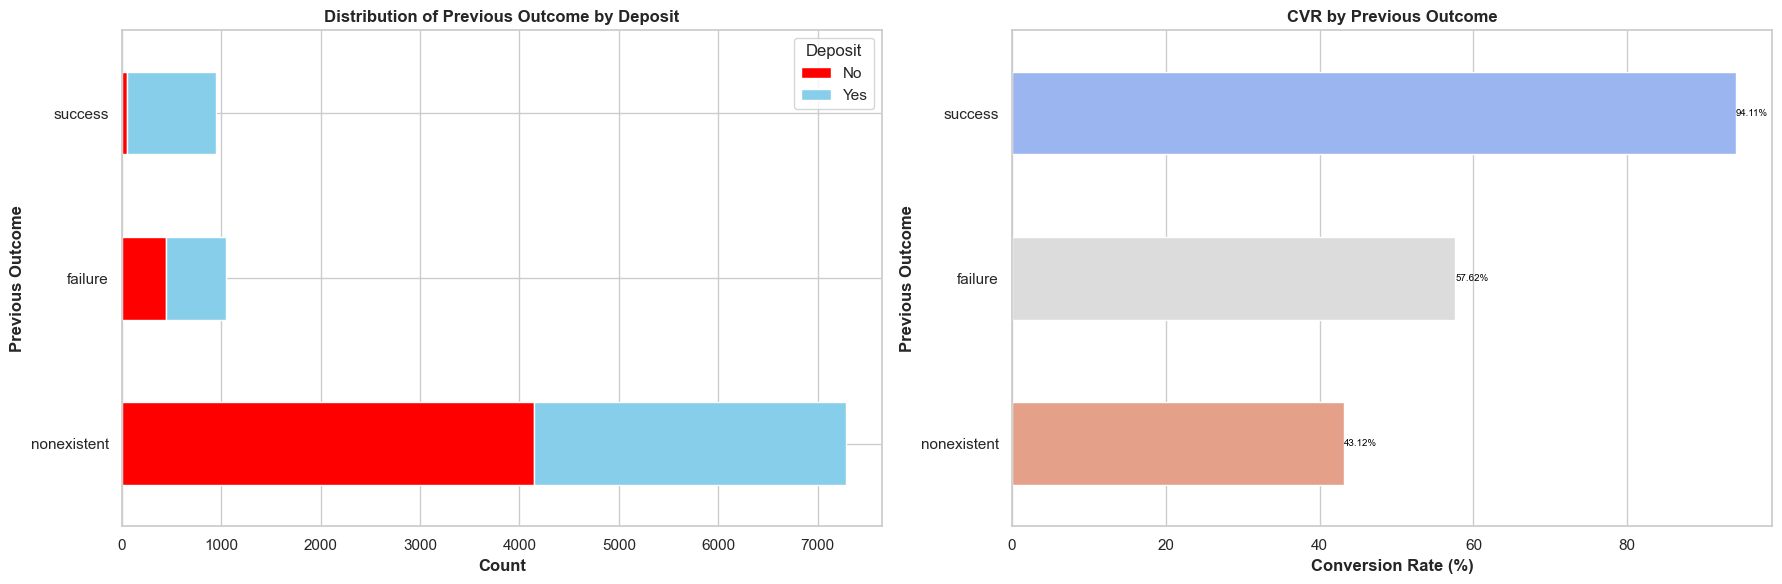

In [40]:
# Determine bar order
poutcome_order = ['nonexistent', 'failure', 'success']

# Create a contingency table with the desired order
contingency_poutcome = pd.crosstab(balanced_df['poutcome'], balanced_df['deposit'])
contingency_poutcome = contingency_poutcome.loc[poutcome_order]

# Calculate Conversion Count and Total Visitor Count based on job
conversion_outcome = balanced_df.groupby('poutcome')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate CVR
conversion_outcome['conversion_rate'] = (conversion_outcome['sum'] / conversion_outcome['count']) * 100

# Sort by CVR
conversion_outcome = conversion_outcome.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_outcome))

# Create figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_poutcome.plot(kind='barh', stacked=True, color=['red', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribution of Previous Outcome by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Previous Outcome', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create horizontal bar plot with percentage values and adjusted colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='poutcome', data=conversion_outcome, ci=None, palette=colors, ax=axes[1], width=0.5)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Previous Outcome', fontweight='bold')
barplot.set_title('CVR by Previous Outcome', fontweight='bold')

# Add percentage values next to the bar
for index, value in enumerate(conversion_outcome['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()

In [41]:
# Variable of interest
var_of_interest = 'poutcome'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_poutcome)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for poutcome: 901.4583662326811
P-value for poutcome: 1.781570200372744e-196
Variable poutcome has a significant relationship with deposit (reject H0)


__Insight__:
1. The conversion rate for "success" is significantly higher than the conversion rates for "failure" and "nonexistent". This suggests that customers who have had a successful deposit in the past are more likely to make another deposit in the future.
2. The p-value is very low, indicating that the observed relationship between poutcome and deposit is statistically significant. This means that we can reject the null hypothesis that there is no relationship between the two variables and conclude that poutcome does have a significant impact on deposit.
3. The chi-square value is high, indicating that the strength of the relationship between poutcome and deposit is strong.

There are a few possible explanations for the observed relationship between poutcome and deposit. Some of the most likely explanations include:

1. Customer experience: Customers who have had a successful deposit in the past may be more likely to make another deposit in the future because they had a positive experience with the company. They may feel confident that the company is trustworthy and that their deposits are safe.
2. Customer satisfaction: Customers who are satisfied with the company's products and services are more likely to make repeat purchases. This is because they believe that the company provides good value for money and that their needs are being met.
3. Customer loyalty: Customers who are loyal to the company are more likely to make repeat purchases, even if they have not had a completely positive experience in the past. This is because they have an emotional connection with the company and are willing to give them the benefit of the doubt.

__Summary of Statistical Tests for Numerical Variables__

|                   | Duration    | Campaign  | PDays       |Previous   |
|-------------------|-------------|-----------|-------------|-----------|
| __Mann-whitneyu__ |             |           |             |           | 
| U-statistic       |3842213.0   | 11941690.0| 8661587.5 | 8364674.5 |
| P-value           | 0.0         | 0.00      | 0.00       | 0.00 |
| Hipotesis     | Reject HO    | Reject HO  | Reject HO  | Reject HO |
| Relationship      |Significant   |Significant | Significant | Significant |

__Summary of Statistical Tests for Kategorical Variables__

| Chi-Squaare  | Contact         | Month        | Day of Week   | Poutcome|
|--------------|-----------------|--------------|---------------|---------|
| U-statistic  | 596.15      | 945.14        | 26.17       | 901.45 |
|   P-value    | 0.00        | 0.00           | 0.00        | 0.00 |
|  Hipotesis   | Reject HO  | Reject HO     | Reject HO    | Reject HO |
|   Relationship   | Significant  | Significant     |  Significant    | Significant |

__Conclusion__:
<br>
All variables are included in the feature modeling.

### <mark>__3. Financial Status and Financing.__</mark> (Default, Housing, Loan)

#### __Default__

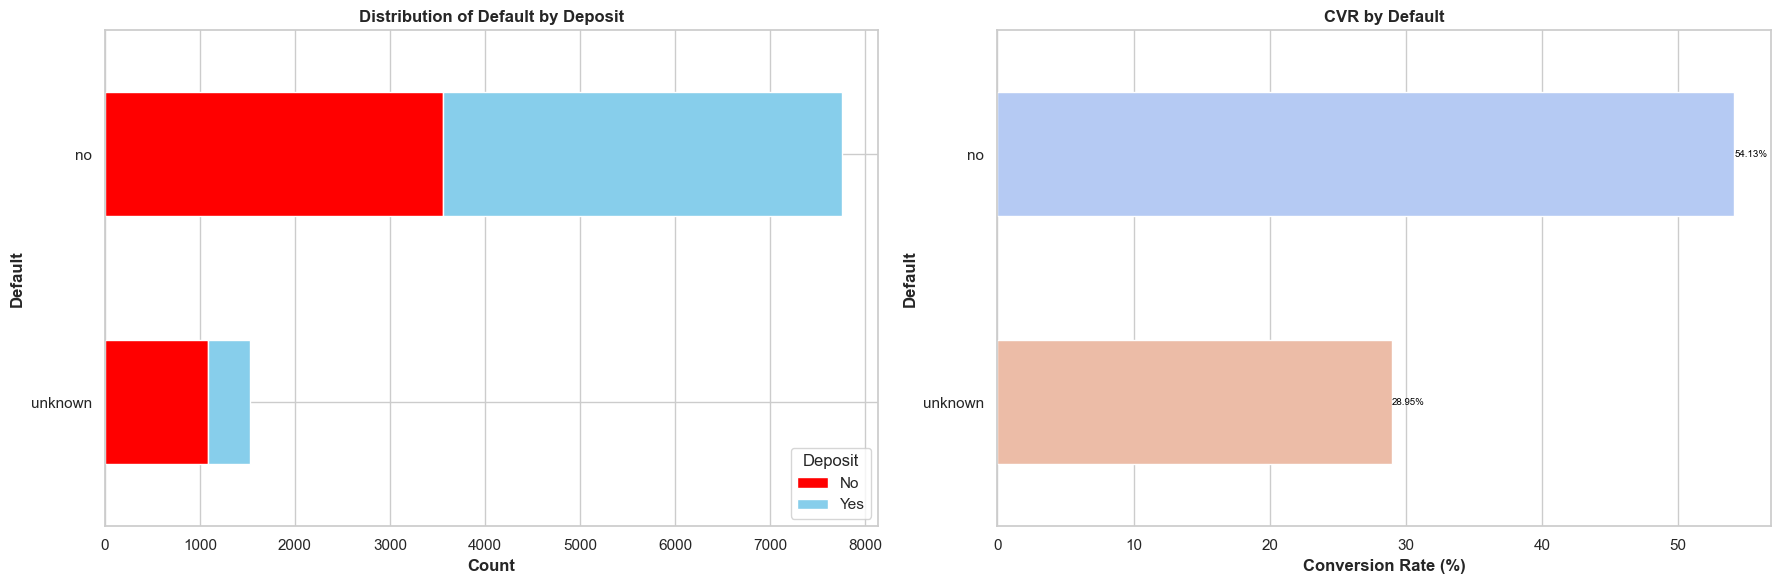

In [42]:
# Define the bar order
default_order = ['unknown', 'no']

# Create a contingency table with the desired order
contingency_default = pd.crosstab(balanced_df['default'], balanced_df['deposit'])
contingency_default = contingency_default.loc[default_order]

# Calculate the Number of Conversions and Total Visitors based on the default category
conversion_default = balanced_df.groupby('default')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate Conversion Rate
conversion_default['conversion_rate'] = (conversion_default['sum'] / conversion_default['count']) * 100

# Sort by Conversion Rate
conversion_default = conversion_default.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_default))

# Create figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_default.plot(kind='barh', stacked=True, color=['red', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribution of Default by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Default', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create a horizontal bar plot with percentage values and adjusted colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='default', data=conversion_default, ci=None, palette=colors, ax=axes[1], width=0.5)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Default', fontweight='bold')
barplot.set_title('CVR by Default', fontweight='bold')

# Add percentage values next to the bar
for index, value in enumerate(conversion_default['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()

In [43]:
# Variable of interest
var_of_interest = 'default'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_default)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for default: 322.8994283907016
P-value for default: 3.3833873203257777e-72
Variable default has a significant relationship with deposit (reject H0)


__Insight__:
1. Customers with no default have a significantly higher conversion rate than those with unknown default status. This suggests that customers with a good credit history are more likely to make a deposit than those with an unknown or poor credit history.
2. The p-value is very low, indicating that the observed relationship between default and deposit is statistically significant. This means that we can reject the null hypothesis that there is no relationship between the two variables and conclude that default does have a significant impact on deposit.
3. The chi-square value is high, indicating that the strength of the relationship between default and deposit is strong.

There are a few possible explanations for the observed relationship between default and deposit:

1. Credit risk: Customers with bad credit history are more likely to be denied a loan or credit card, which can make it difficult for them to make a deposit.
2. Risk aversion: Customers with bad credit history may be more risk-averse and less likely to make a deposit, as they may be concerned about the potential for financial difficulty.
3. Negative experiences: Customers with bad credit history may have had negative experiences with banks or other financial institutions in the past, which can make them hesitant to make a deposit.

#### __Housing__

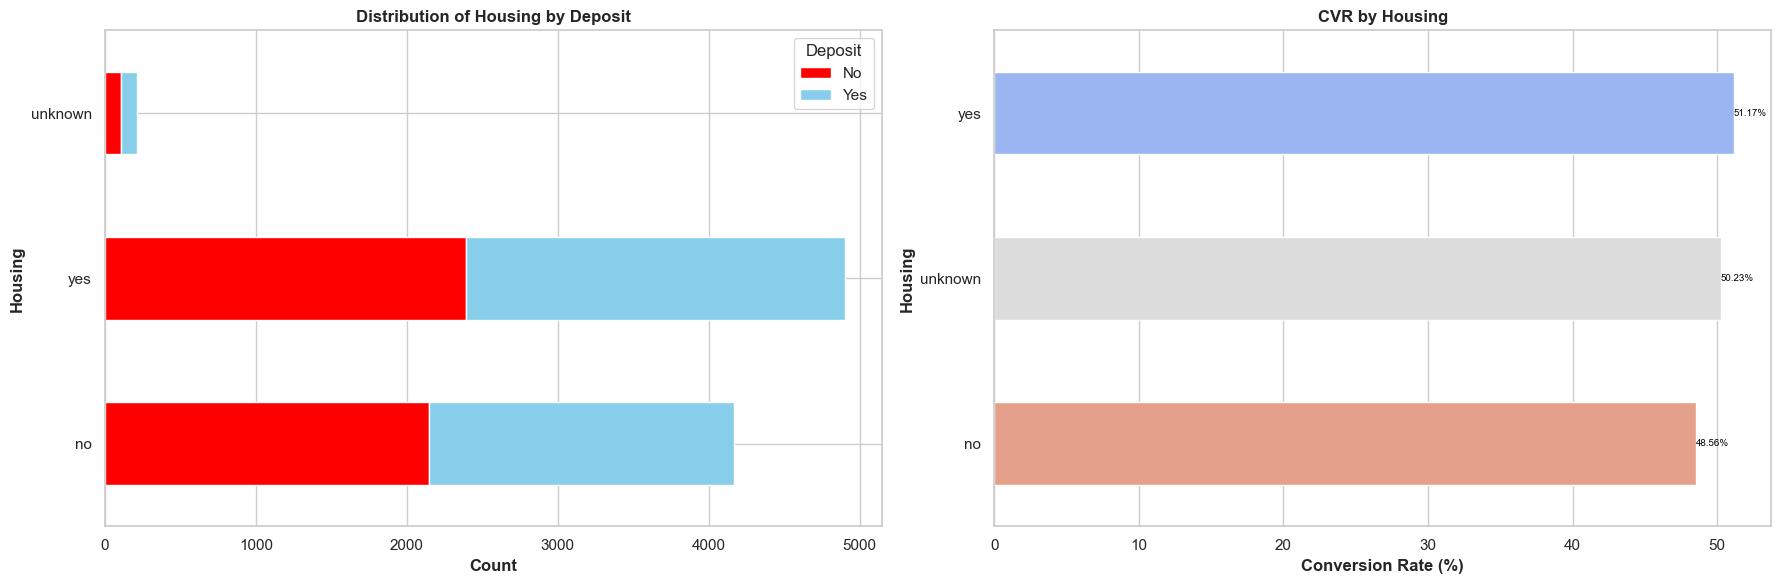

In [44]:
# Define the bar order
housing_order = ['no', 'yes', 'unknown']

# Create a contingency table with the desired order
contingency_housing = pd.crosstab(balanced_df['housing'], balanced_df['deposit'])
contingency_housing = contingency_housing.loc[housing_order]

# Calculate the Number of Conversions and Total Visitors based on the housing category
conversion_housing = balanced_df.groupby('housing')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate Conversion Rate
conversion_housing['conversion_rate'] = (conversion_housing['sum'] / conversion_housing['count']) * 100

# Sort by Conversion Rate
conversion_housing = conversion_housing.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_housing))

# Create figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_housing.plot(kind='barh', stacked=True, color=['red', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribution of Housing by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Housing', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create a horizontal bar plot with percentage values and adjusted colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='housing', data=conversion_housing, ci=None, palette=colors, ax=axes[1], width=0.5)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Housing', fontweight='bold')
barplot.set_title('CVR by Housing', fontweight='bold')

# Add percentage values next to the bar
for index, value in enumerate(conversion_housing['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()

In [45]:
# Variable of interest
var_of_interest = 'housing'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_housing)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for housing: 6.155740138941564
P-value for housing: 0.04605725099641046
Variable housing has a significant relationship with deposit (reject H0)


__Insight__:
1. Customers with a housing loan (yes) have a slightly higher conversion rate than those with no housing loan (no). This suggests that customers who are already invested in real estate may be more likely to make a deposit, as they may perceive it as a way to save for the future or as a means of diversifying their investments.
2. The conversion rate for customers with unknown housing status is also relatively high. This may suggest that customers who are unsure whether or not they have a housing loan are still interested in making a deposit, possibly as a way to explore their options or to prepare for a future purchase.
3. The p-value is relatively low, indicating that the observed relationship between housing and deposit is statistically significant. This means that we can reject the null hypothesis that there is no relationship between the two variables and conclude that housing does have a significant impact on deposit.
4. The chi-square value is moderate, indicating that the strength of the relationship between housing and deposit is moderate.

There are a few possible explanations for the observed relationship between housing and deposit:

1. Financial stability: Customers with a housing loan may be perceived as being more financially stable than those without a housing loan. This is because they have already demonstrated their ability to manage a significant financial commitment.
2. Investment potential: Customers with a housing loan may view making a deposit as a way to save for the future or as a means of diversifying their investments. This is because real estate is often seen as a relatively safe and stable asset class.
3. Life stage: Customers with a housing loan may be at a stage in their life where they are more likely to have the financial resources to make a deposit. This is because they may have already established their careers and have a steady income.

#### __Loan__

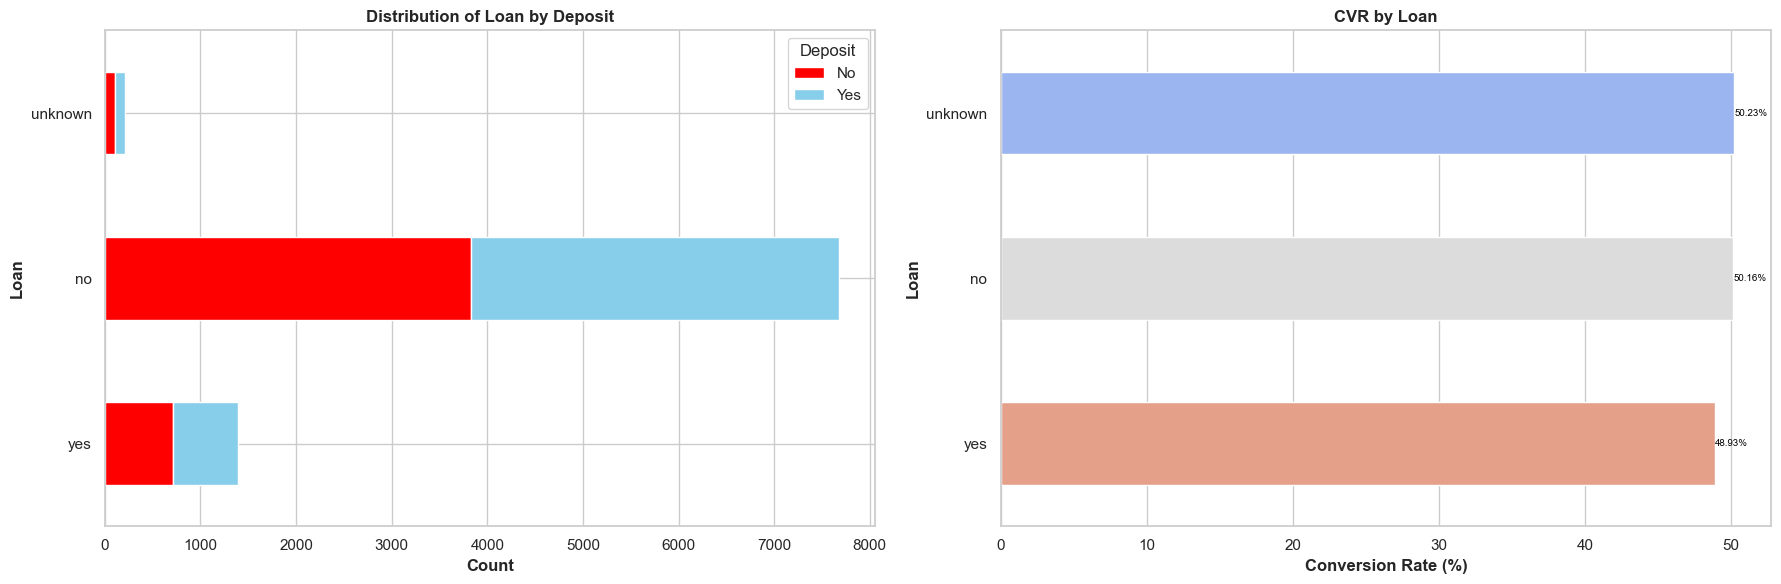

In [46]:
# Determine the bar order
loan_order = ['yes', 'no', 'unknown']

# Create a contingency table with the desired order
contingency_loan = pd.crosstab(balanced_df['loan'], balanced_df['deposit'])
contingency_loan = contingency_loan.loc[loan_order]

# Calculate the Number of Conversions and Total Visitors based on the loan category
conversion_loan = balanced_df.groupby('loan')['deposit'].agg(['sum', 'count']).reset_index()

# Calculate Conversion Rate
conversion_loan['conversion_rate'] = (conversion_loan['sum'] / conversion_loan['count']) * 100

# Sort by Conversion Rate
conversion_loan = conversion_loan.sort_values(by='conversion_rate', ascending=False)

# Desired colors (sky blue and red)
colors = sns.color_palette("coolwarm", n_colors=len(conversion_loan))

# Create figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot stacked bar chart in the first subplot
contingency_loan.plot(kind='barh', stacked=True, color=['red', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribution of Loan by Deposit', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Loan', fontweight='bold')
axes[0].legend(title='Deposit', labels=['No', 'Yes'])

# Create a horizontal bar plot with percentage values and adjusted colors in the second subplot
barplot = sns.barplot(x='conversion_rate', y='loan', data=conversion_loan, ci=None, palette=colors, ax=axes[1], width=0.5)
barplot.set_xlabel('Conversion Rate (%)', fontweight='bold')
barplot.set_ylabel('Loan', fontweight='bold')
barplot.set_title('CVR by Loan', fontweight='bold')

# Add percentage values next to the bar
for index, value in enumerate(conversion_loan['conversion_rate']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=7)

plt.tight_layout()
plt.show()

In [47]:
# Variable of interest
var_of_interest = 'loan'

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_loan)

# Printing the results
print(f"Chi-square value for {var_of_interest}: {chi2}")
print(f"P-value for {var_of_interest}: {p}")

alpha = 0.05
if p < alpha:
    print(f"Variable {var_of_interest} has a significant relationship with deposit (reject H0)")
else:
    print(f"There is no statistical evidence for a relationship between {var_of_interest} and deposit (cannot reject H0)")

Chi-square value for loan: 0.7291247957296885
P-value for loan: 0.6945004992921295
There is no statistical evidence for a relationship between loan and deposit (cannot reject H0)


__Insight__:
<br>
<b>From the conducted statistical test, it appears that the test results indicate a lack of a significant relationship between the 'loan' variable and 'deposit.' As a result, we have decided not to include the 'loan' variable in the feature modeling.

__Summary Statistic Table__

| Chi-Squaare  | Default         | Housing        | Loan     |
|--------------|-------------|----------------|---------------|
| U-statistic  |322.3      |  6.15       | 0.72        |
|   P-value    | 0.00        |  0.04          | 0.69          |
|  Hipotesis   | Reject HO  | Reject HO    | Accept HO    |
|   Relationship   | Significant  | Significant    | Not Significant    |

__Conclusion__:
<br>
Because 'Loan' does not have a significant impact, only 'Default' and 'Housing' will be included in the feature modeling.

### <mark>__4. Economic Conditions and Interest Rates.__</mark> (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed)

#### __emp.var.rate__

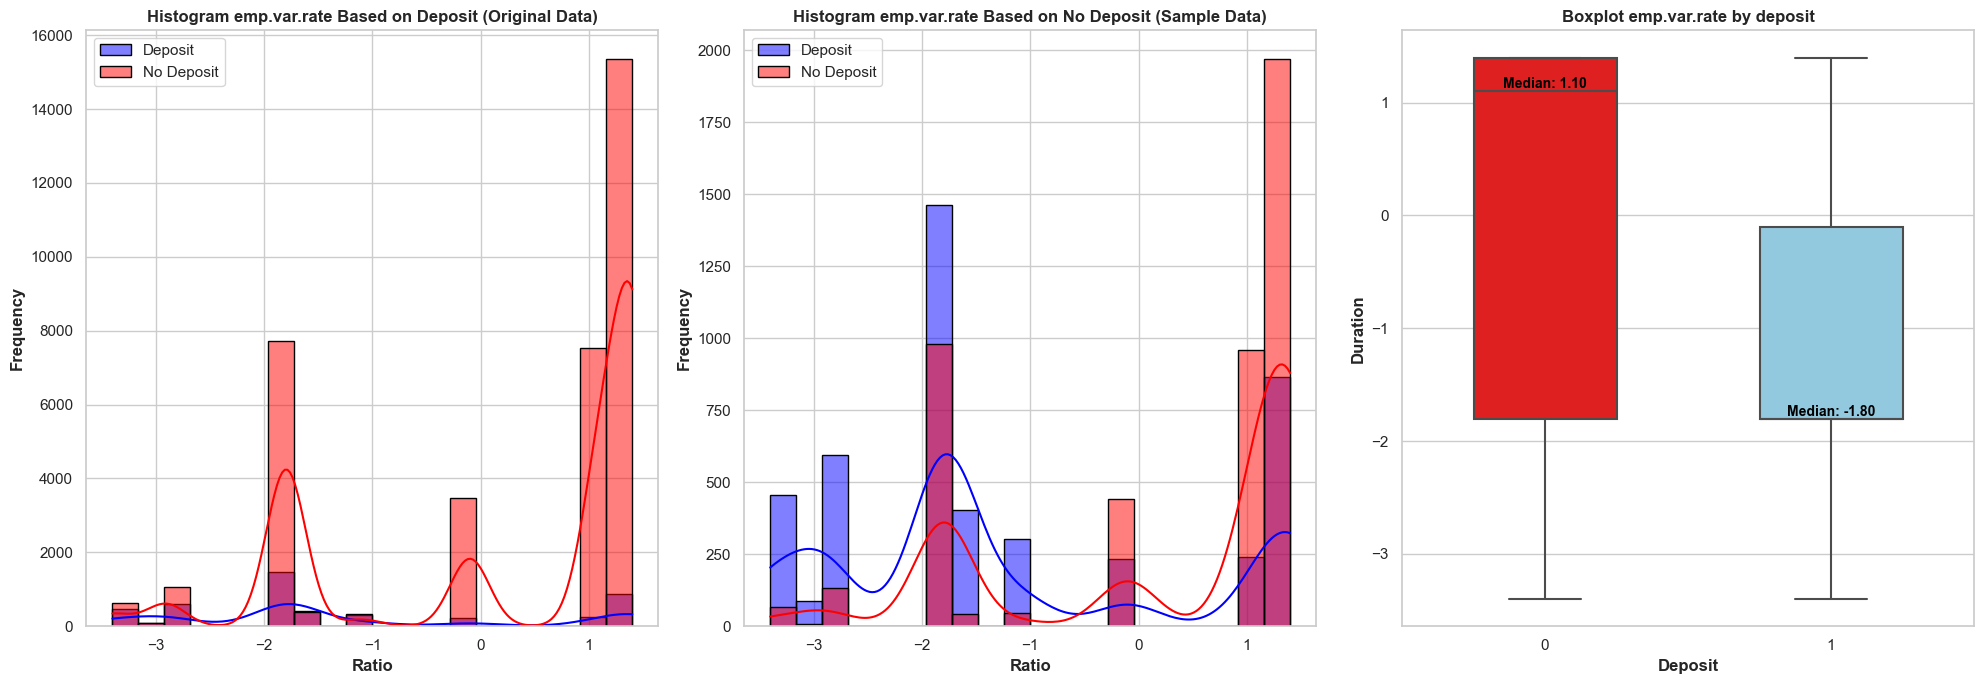

In [48]:
# Determine the numeric variable and target variable
numerical_variable = 'emp.var.rate'
target_variable = 'deposit'

# Calculate the median for each category on the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['emp.var.rate'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['emp.var.rate'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram emp.var.rate Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['emp.var.rate'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['emp.var.rate'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram emp.var.rate Based on No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for boxplot
plt.subplot(1, 3, 3)
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


It appears that there is a difference in the median values of 'emp.var.rate' (employment variation rate) between those who made a deposit and those who did not. Specifically, those who made a deposit have a median rate of -1.80, while those who did not make a deposit have a median rate of 1.10.
<br>
The difference in median 'emp.var.rate' values between those who made a deposit (median rate of -1.80) and those who did not (median rate of 1.10) could be attributed to the economic conditions during the respective periods. Positive economic conditions may encourage deposit behavior, while negative economic conditions may lead to a decrease in deposit activity.

In [49]:
# Calculating Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['emp.var.rate'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpreting the results
if p_value < 0.05:  # using a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject the null hypothesis of no significant correlation.")

Spearman Correlation Coefficient: -0.39091187140172284
P-Value: 0.0
Significant negative correlation.


In [50]:
from scipy import stats

variable = 'emp.var.rate'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(balanced_df[balanced_df[target_variable] == 0][variable], balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-Test between {variable} and {target_variable}:")
print(f"T-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

T-Test between emp.var.rate and deposit:
T-statistic: 46.73686588132679
P-value: 0.0
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
<br>
The negative correlation indicates that as the employment variation rate decreases (which could correspond to economic downturns), the likelihood of making a deposit increases. This negative correlation suggests that customers may be more inclined to make deposits during periods of economic instability, possibly seeking to secure their funds or make conservative financial decisions.

#### __cons.price.idx__

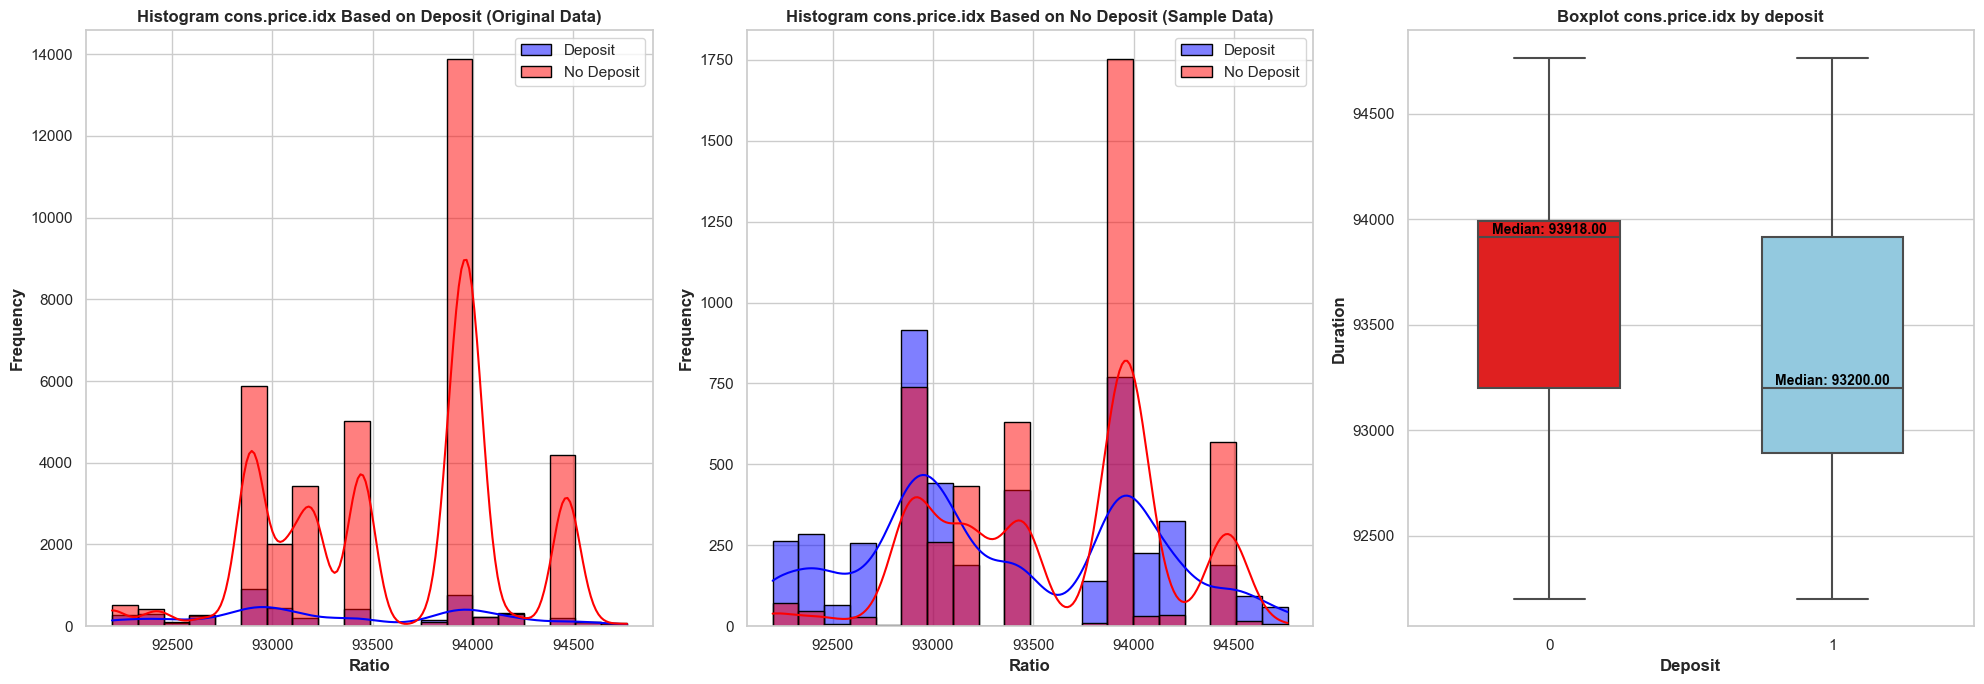

In [51]:
# Determine the numeric variable and target variable
numerical_variable = 'cons.price.idx'
target_variable = 'deposit'

# Calculate the median for each category on the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['cons.price.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['cons.price.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram cons.price.idx Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['cons.price.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['cons.price.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram cons.price.idx Based on No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for boxplot
plt.subplot(1, 3, 3)
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

Both the raw data distribution and the distribution after sampling for the variable 'cons.price.idx' exhibit a normal distribution. Additionally, there is a difference in the median values of the Consumer Price Index (CPI) between those who make deposits and those who do not, as evident from the boxplot (with a median of 93.20 for depositors and 93.92 for non-depositors).

In [52]:
# Calculating Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['cons.price.idx'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpreting the results
if p_value < 0.05:  # using a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject the null hypothesis of no significant correlation.")

Spearman Correlation Coefficient: -0.19847890958813888
P-Value: 4.2631622519317186e-83
Significant negative correlation.


In [53]:
variable = 'cons.price.idx'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(balanced_df[balanced_df[target_variable] == 0][variable], balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-Test between {variable} and {target_variable}:")
print(f"T-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

T-Test between cons.price.idx and deposit:
T-statistic: 19.97329298798265
P-value: 6.204984838354888e-87
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
<br>
1. The difference in the median values of the Consumer Price Index (CPI) between those who make deposits and those who do not, as observed in the boxplot (with a median of 93.20 for depositors and 93.92 for non-depositors), can be explained by economic and financial factors influencing consumer behavior. Potential explanations include the sensitivity of deposit-making customers to price changes, where they may engage in financial transactions or make deposit decisions when prices are relatively lower, reflecting a strategy to leverage favorable economic conditions

2. A negative correlation coefficient suggests an inverse relationship between the Consumer Price Index and the likelihood of making a deposit. In this context, as the Consumer Price Index decreases (indicating lower inflation or lower prices for goods and services), there is a tendency for the likelihood of making a deposit to increase. 

3. The Consumer Price Index is a measure of inflation or the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. A negative correlation may suggest that during periods of lower inflation or deflation, individuals are more inclined to make deposits. This behavior may be influenced by a perception that preserving liquidity during times of lower inflation is advantageous.

#### __cons.conf.idx__

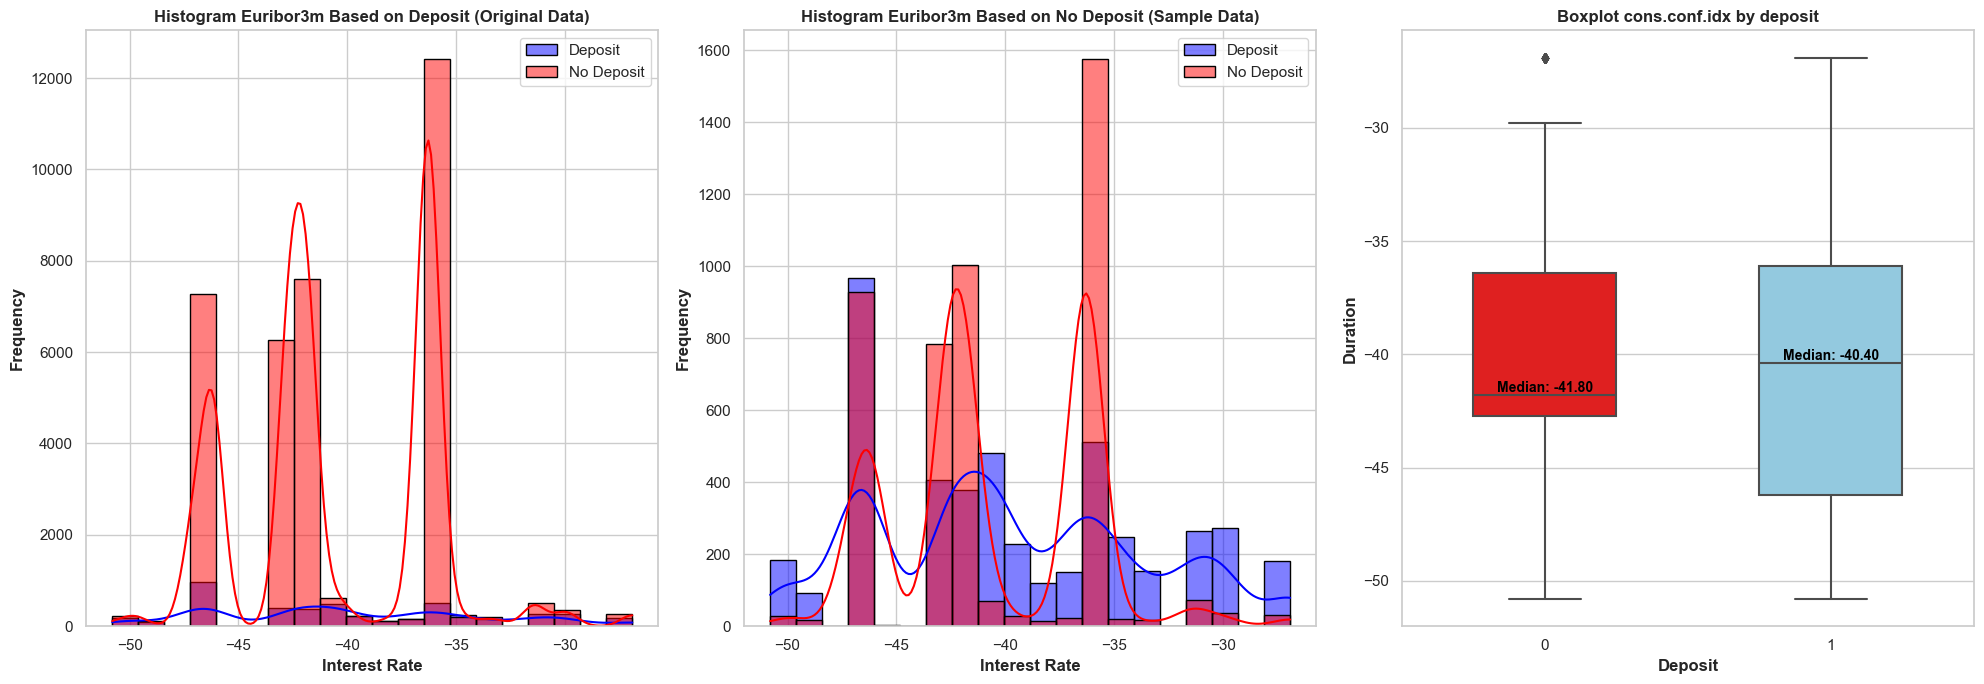

In [54]:
# Determine the numeric variable and target variable
numerical_variable = 'cons.conf.idx'
target_variable = 'deposit'

# Calculate the median for each category on the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['cons.conf.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['cons.conf.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Euribor3m Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Interest Rate', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['cons.conf.idx'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['cons.conf.idx'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram Euribor3m Based on No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Interest Rate', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Boxplot
plt.subplot(1, 3, 3)
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

Both the raw data distribution and the distribution after sampling for the variable 'cons.conf.idx' exhibit a normal distribution. Additionally, there is a difference in the median values of the Consumer Confidence Index (CCI) between those who make deposits and those who do not, as evident from the boxplot (with a median of -40.40 for depositors and -41.80 for non-depositors).

In [55]:
# Calculating Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['cons.conf.idx'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpreting the results
if p_value < 0.05:  # using a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject the null hypothesis of no significant correlation.")

Spearman Correlation Coefficient: 0.06786321150835929
P-Value: 5.956718962666828e-11
Significant positive correlation.


In [56]:
variable = 'cons.conf.idx'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(balanced_df[balanced_df[target_variable] == 0][variable], balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-Test between {variable} and {target_variable}:")
print(f"T-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

T-Test between cons.conf.idx and deposit:
T-statistic: -7.622102871618694
P-value: 2.7407703422312666e-14
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
1. The difference in the median values of the Consumer Confidence Index (CCI) between those who make deposits and those who do not, as observed in the boxplot (with a median of -40.40 for depositors and -41.80 for non-depositors), can be attributed to various economic and financial factors influencing consumer behavior. One potential explanation is that customers not making deposits may exhibit a more conservative financial approach, with a higher median CCI indicating a cautious stance. This behavior could be influenced by a preference for maintaining liquidity or reducing financial risk during specific periods, leveraging a strategy to navigate economic conditions more conservatively.

23. The Consumer Confidence Index is a measure reflecting consumers' confidence in economic conditions. A positive correlation may imply that during periods of higher confidence, individuals are more likely to make deposits. This behavior might stem from a perception that preserving liquidity during times of economic is advantageous. The positive correlation suggests that as confidence increase, the inclination to make deposits increases, possibly driven by a desire for financial security and risk aversion.

#### __nr.employed__

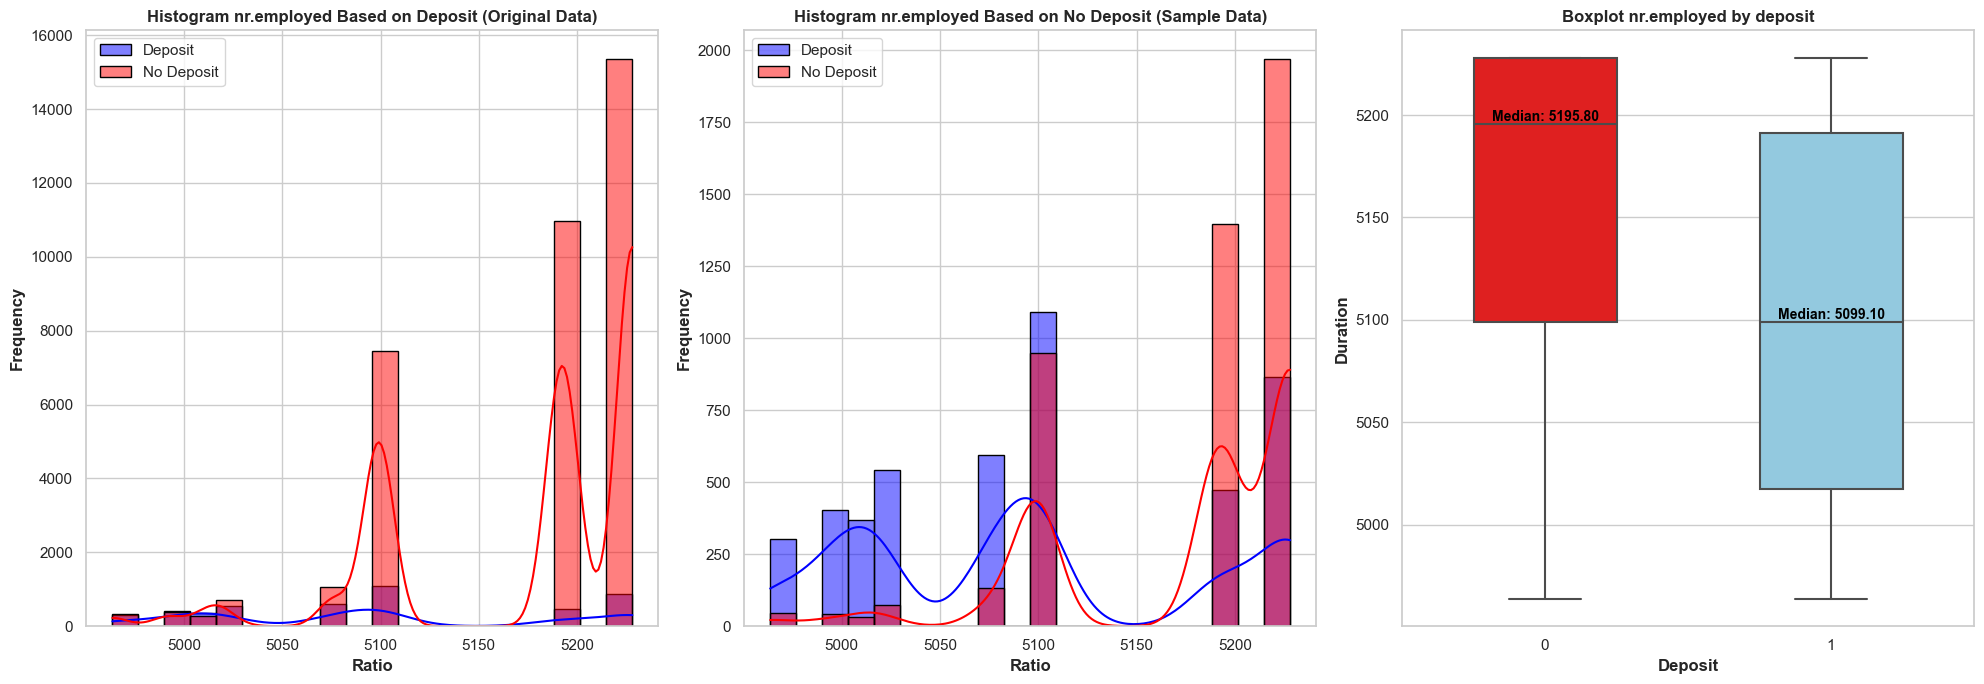

In [57]:
# Define numerical and target variables
numerical_variable = 'nr.employed'
target_variable = 'deposit'

# Calculate median for each category in the target variable
median_values = balanced_df.groupby(target_variable)[numerical_variable].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Set plot size
plt.figure(figsize=(20, 7))

# Subplot for Raw Data
plt.subplot(1, 3, 1)
sns.histplot(deposit_1['nr.employed'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_0['nr.employed'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram nr.employed Based on Deposit (Original Data)', fontweight='bold')
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for Sample Data
plt.subplot(1, 3, 2)
sns.histplot(deposit_yes['nr.employed'], bins=20, kde=True, color='blue', edgecolor='black', label='Deposit')
sns.histplot(deposit_no['nr.employed'], bins=20, kde=True, color='red', edgecolor='black', label='No Deposit')
plt.title('Histogram nr.employed Based on No Deposit (Sample Data)', fontweight='bold')
plt.xlabel('Ratio', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()

# Subplot for boxplot
plt.subplot(1, 3, 3)
target_variable = 'deposit'
numerical_variable = 'nr.employed'
boxplot = sns.boxplot(x=target_variable, y=numerical_variable, data=balanced_df, palette=['red', 'skyblue'], width=0.5)
plt.title(f'Boxplot {numerical_variable} by {target_variable}', fontweight='bold')
plt.xlabel('Deposit', fontweight='bold')
plt.ylabel('Duration', fontweight='bold')

# Add values above each box
medians = balanced_df.groupby(target_variable)[numerical_variable].median().values
for index, value in enumerate(medians):
    boxplot.text(index, value, f'Median: {value:.2f}', ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

Both the raw data distribution and the distribution after sampling for the variable 'nr.employed' exhibit a normal distribution. Additionally, there is a difference in the median values of the nr.employed between those who make deposits and those who do not, as evident from the boxplot (with a median of 5099.10 for depositors and 5195.80 for non-depositors).

In [58]:
# Calculating Spearman correlation coefficient
correlation, p_value = spearmanr(balanced_df['nr.employed'], balanced_df['deposit'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Interpreting the results
if p_value < 0.05:  # using a significance level of 0.05
    if correlation > 0:
        print("Significant positive correlation.")
    elif correlation < 0:
        print("Significant negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("Insufficient evidence to reject the null hypothesis of no significant correlation.")

Spearman Correlation Coefficient: -0.44594399774355153
P-Value: 0.0
Significant negative correlation.


In [59]:
# Performing t-test
variable = 'nr.employed'
target_variable = 'deposit'
statistic, p_value = stats.ttest_ind(balanced_df[balanced_df[target_variable] == 0][variable],
                                     balanced_df[balanced_df[target_variable] == 1][variable])

# Set the significance level (alpha level)
alpha = 0.05

# Print the results
print(f"T-Test between {variable} and {target_variable}:")
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the two groups or variables.")
else:
    print("Insufficient evidence to reject the null hypothesis.")
    print("There is no significant difference between the two groups or variables.")

T-Test between nr.employed and deposit:
U-statistic: 51.58150333516822
P-value: 0.0
Reject the null hypothesis.
There is a significant difference between the two groups or variables.


__Insight__:
1. The substantial difference in median values for 'nr.employed' between depositors (median of 5195.80) and non-depositors (median of 5099.10), as depicted in the boxplot, implies a pronounced divergence in the number of employees between the two groups. A higher median for depositors may suggest that they are more likely to make deposits during periods of economic stability or growth, possibly influenced by increased confidence in the job market. Conversely, non-depositors may exhibit a more conservative financial approach during periods of economic uncertainty, reflected in a lower median 'nr.employed' value.

2. The observed significant negative correlation between 'nr.employed' and deposit indicates an inverse relationship between the number of employees and the likelihood of making a deposit. As the number of employed individuals decreases (indicating potential economic downturn or instability), there is a tendency for individuals to be more inclined to make deposits. This correlation reflects the impact of economic conditions on consumer behavior, where lower employment levels may lead to increased deposit-making as individuals seek to secure their funds or make conservative financial decisions during uncertain economic periods.

__Summary Statistic Table__

|            | emp.var.rate| cons.price.idx  | cons.conf.idx   | nr.employed |
|-------------|-------------|-----------|-----------|----------|
| __T-Test__ |   | |  | | |
| U-statistic   |46.68736   | 19.97   | -7.62 | 51.58 |
| P-value       | 0.0      | 0.00      | 0.00 | 0.0 |
| Hipotesis     | Reject HO   | Reject HO  | Reject HO  |  Reject HO |
| Relationship      |Significant   |Significant | Significant | Significant |

__Conclusion__ :
<br>
All variables are included in the feature modeling.

In [60]:
#save our sample data to be reprocess in modelling
# balanced_df.to_excel('bank-additional-samples.xlsx',index=False)